In [845]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

In [846]:
## loading dataset
df = pd.read_csv('train.csv')
df_train = pd.read_csv('train.csv')

In [847]:
def heatMap(df_train,expectation1=None,expectation2=None):
    df = pd.read_csv('summary.csv')
    if expectation2==None:
        cols = df[(df.expectations==expectation1) |(df.feature=='loan_status')].feature
    elif expectation1 == None:
        cols = df_train.feature
    else:
        cols = df[(df.expectations==expectation2) | (df.expectations==expectation1) |(df.feature=='loan_status')].feature
    corrmat = df_train[cols].corr()
    f, ax = plt.subplots(figsize=(18, 9))
    sns.heatmap(corrmat, square=True)
    return

# cols = df[df.expectations=='high'].feature
# df_train[cols].describe(include=['O'])

def pivot(col): ### pivot_table for two categorical features one being loan_status
    return pd.pivot_table(df_train,'member_id',index=[col],columns=['loan_status'],aggfunc='count')

def group(col): ### create group of two categorical feature one being loan_status
    return df_train[[col,'loan_status']].groupby([col],as_index=False).mean().sort_values(by='loan_status',ascending=False)

def plot_bar(col):
    df = pivot(col)
    name_x = list(df.index)
    y1 = df[1].values/532428.0
    y0 = df[0].values/532428.0
    x = np.array(range(1,len(name_x)+1))
    

    fig= plt.figure()
    ax = fig.add_subplot(111)
    ax.bar(x-0.25,y0,width=0.25,color='r')
    ax.bar(x,y1,width=0.25,color='b')
    
    ax.set_ylabel(col)
    ax.set_title("{} vs defaulter(0,1)".format(col))
    ax.set_xticks(x)
    ax.set_xticklabels(name_x)
    ax.legend(['0','1'], loc='upper right')
    plt.xticks(rotation=70)
    plt.show()
    return

def plot_hist(df,col,bin_size,log=None):
    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(111)
    if log==True:
        x0 = np.log(df[df.loan_status==0][col].dropna().values+1)
        x1 = np.log(df[df.loan_status==1][col].dropna().values+1)
        min_ = min(np.log(df[col].dropna().values+1))
        max_ = max(np.log(df[col].dropna().values+1))
        bins = np.linspace(min_,max_,bin_size)
    else:
        x0 = df[df.loan_status==0][col].dropna().values
        x1 = df[df.loan_status==1][col].dropna().values
        bins = np.linspace(df[col].min(),df[col].max(),bin_size)
    ax.hist(x1,bins=bins,label='1',color='b',alpha=0.5)
    ax.hist(x0,bins=bins,label='0',color='g',alpha=0.5)
    ax.set_ylabel("total members")
    ax.set_xlabel(col)
    ax.set_title("{} vs defaulter(0,1)".format(col))
    ax.set_xticks(bins)
    plt.xticks(rotation=70)
    plt.legend(loc='upper right')
    plt.show()
    return

def plot_box0(df,col):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x0 = df[df.loan_status==0][col].dropna().values
    ax.boxplot(x0)
    ax.set_ylabel("{}-0".format(col))
    ax.set_title("{} vs defaulter(0,1)".format(col))
    plt.show()
    return

def plot_box1(df,col):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x1 = df[df.loan_status==1][col].dropna().values
    ax.boxplot(x1)
    ax.set_ylabel("{}-1".format(col))
    ax.set_title("{} vs defaulter(0,1)".format(col))
    plt.show()
    return
def plot_scatter_box(df,col):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x0 = df[df.loan_status==0][col].dropna().values
    y0 = np.array([1]*len(x0))
    x1 = df[df.loan_status==1][col].dropna().values
    y1 = np.array([4]*len(x1))
    print len(x0),len(x1)
    
    ax.scatter(x0,y0,color='r',label='0')
    ax.scatter(x1,y1,color='b',label='1')
    ax.set_title("{} vs defaulters(0,1)".format(col))
    ax.set_xlabel(col)
    ax.legend(['0','1'],loc = 'upper right')
    plt.show()
    return

def get_train_test():
    df_train = pd.read_csv('train.csv')
    df_test = pd.read_csv('test.csv')
    df = pd.concat([df_train,df_test],ignore_index=True)
    return df

# this filter select all objet but slect only those int and float
# which was slected by first dirty implementation
def get_duo_filter1():
    df_duo = get_train_test()
    col_int = ['acc_now_delinq','annual_inc','collection_recovery_fee','delinq_2yrs','dti','funded_amnt','inq_last_6mths','int_rate','open_acc','pub_rec','tot_coll_amt','tot_cur_bal','total_acc','loan_status','revol_bal']
    col_obj = [col for col in df_duo.columns if str(df_duo[col].dtype)=='object']
    cols = col_obj + col_int
    return df_duo[cols]
#df_duo = get_duo_filter1()
df_duo = get_train_test()

def dummy_it(df,col_old,col_new):
    df_col_new = pd.get_dummies(df[col_new],prefix = col_new)
    df = pd.concat([df,df_col_new],axis=1)
    return df.drop([col_old,col_new],axis=1)

def dummy_it_simple(df,col):
    df_col = pd.get_dummies(df[col],prefix = col)
    df = pd.concat([df,df_col],axis=1)
    return df.drop([col],axis=1)

def freq(df,col):
    print "max",df[col].max()
    print "min",df[col].min()
    return df[col].value_counts()

def plot_boxes(df,col):
    plot_box0(df,col)
    plot_box1(df,col)
    plot_scatter_box(df,col)
    return

def descp(df,col):
    print df[col].describe()
    return freq(df,col)

def log_it(df,col):
    df.loc[df[col].notnull(),col] = np.log(df[col].dropna().values+1)
    return df

# all queries for selection are done on ->df and all queries for engineering are done on ->df_duo

# for column = term

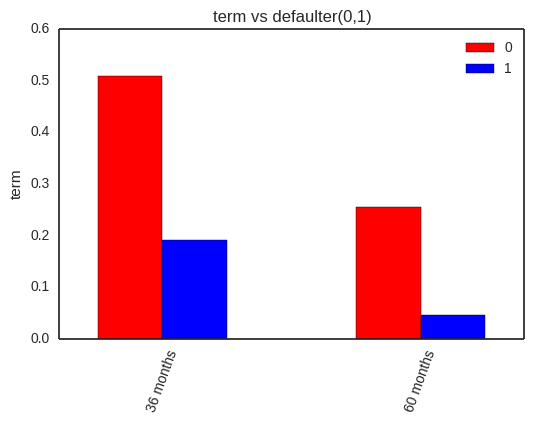

In [848]:
plot_bar('term')

In [849]:
group('term')

,term,loan_status
0,36 months,0.272733
1,60 months,0.151308


In [850]:
df_duo.drop(['term'],axis=1,inplace=True)

# for column = emp_length

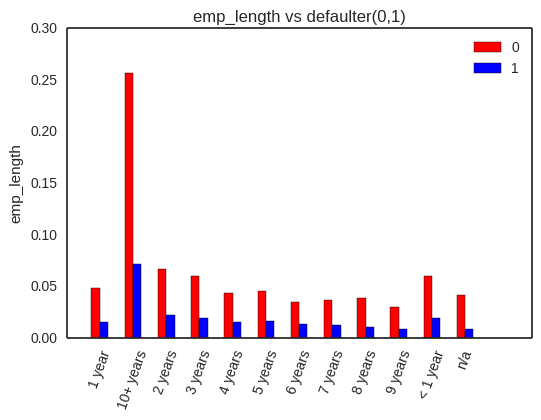

In [851]:
plot_bar('emp_length')

In [852]:
group('emp_length')

,emp_length,loan_status
6,6 years,0.281186
5,5 years,0.267212
7,7 years,0.260045
4,4 years,0.257750
2,2 years,0.250338
0,1 year,0.249518
10,< 1 year,0.245971
3,3 years,0.241826
9,9 years,0.229457
8,8 years,0.225806


In [853]:
### encoding (10,8,9),(n/a),(1,<1,2,3,4),(7,5,6)
df_duo['emp_duration'] = df_duo['emp_length'].map({
    '10+ years' : 'high',
    '8 years' : 'high',
    '9 years' : 'high',
    'n/a' : 'None',
    '1 years' : 'low',
    '< 1 year' : 'low',
    '2 years' : 'low',
    '3 years' : 'low',
    '7 years' : 'medium',
    '6 years' : 'medium',
    '5 years' : 'medium'
})
df_duo = dummy_it(df_duo,'emp_length','emp_duration')

# for column = home_ownership

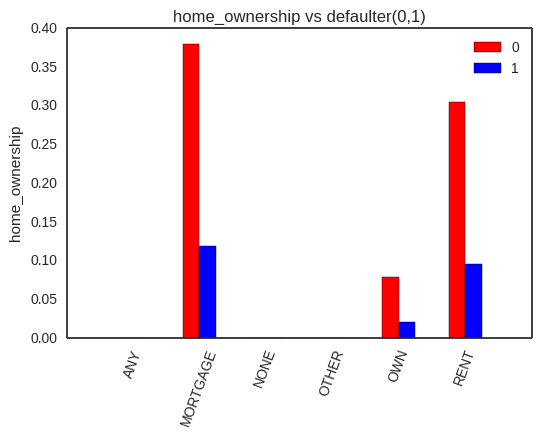

In [854]:
plot_bar('home_ownership')

In [855]:
print group('home_ownership')
print 
pivot('home_ownership')

  home_ownership  loan_status
2           NONE     0.777778
3          OTHER     0.769231
0            ANY     0.333333
5           RENT     0.239554
1       MORTGAGE     0.239137
4            OWN     0.207485



loan_status,0,1
home_ownership,,
ANY,2,1
MORTGAGE,202344,63596
NONE,8,28
OTHER,27,90
OWN,41737,10927
RENT,162483,51185


In [856]:
### encoding (none,other),(any),(rent,own,mortage)
df_duo['ownership'] = df_duo['home_ownership'].map({
    'NONE': 'low',
    'OTHER': 'low',
    'ANY': 'medium',
    'RENT': 'high',
    'OWN' : 'high',
    'MORTGAGE': 'high'
})
df_duo = dummy_it(df_duo,'home_ownership','ownership')

# for column = verification_status

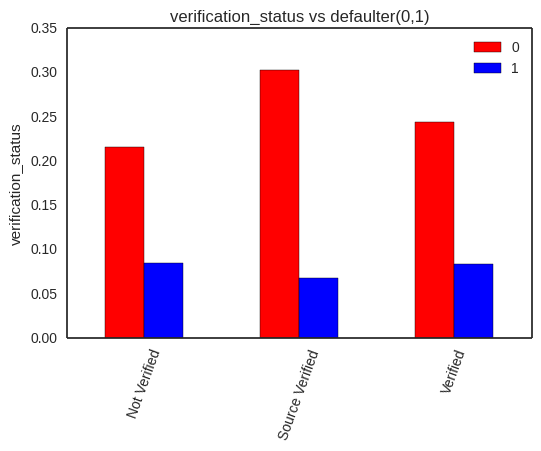

In [857]:
plot_bar('verification_status')

In [858]:
print group('verification_status')
print 
pivot('verification_status')

  verification_status  loan_status
0        Not Verified     0.280967
2            Verified     0.254479
1     Source Verified     0.184177



loan_status,0,1
verification_status,,
Not Verified,115028,44948
Source Verified,161329,36421
Verified,130244,44458


In [859]:
## encode it directly with dummy_it_simple
df_duo = dummy_it_simple(df_duo,'verification_status')

# for column = purpose

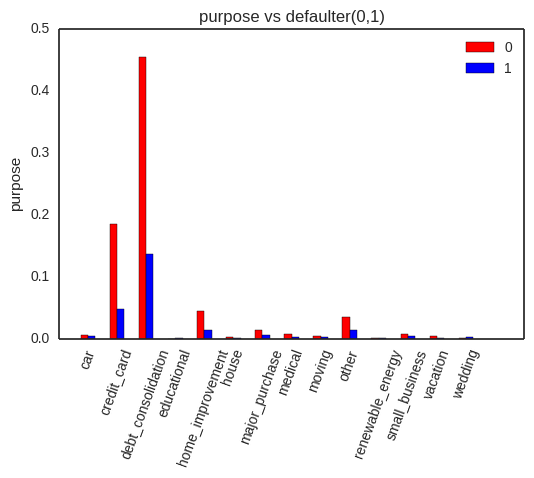

In [860]:
plot_bar('purpose')

In [861]:
print group('purpose')
print 
pivot('purpose')

               purpose  loan_status
3          educational     0.792308
13             wedding     0.743041
5                house     0.383410
10    renewable_energy     0.371601
0                  car     0.367262
11      small_business     0.332574
6       major_purchase     0.318456
8               moving     0.300956
12            vacation     0.273826
9                other     0.272220
7              medical     0.271839
4     home_improvement     0.248625
2   debt_consolidation     0.231840
1          credit_card     0.206162



loan_status,0,1
purpose,,
car,3332,1934
credit_card,98174,25496
debt_consolidation,241962,73027
educational,54,206
home_improvement,23358,7729
house,1338,832
major_purchase,7009,3275
medical,3726,1391
moving,2267,976


In [862]:
## encoding
df_duo['loan_purpose'] = df_duo['purpose'].map({
    'educational' : 'lev1',
    'wedding' : 'lev1',
    'house' : 'lev2',
    'renewable_energy' : 'lev2',
    'car' : 'lev2',
    'small_business' : 'lev3',
    'major_purchase' : 'lev3',
    'moving' : 'lev3',
    'vacation' : 'lev4',
    'other' : 'lev4',
    'medical' : 'lev4',
    'home_improvement' : 'lev5',
    'debt_consolidation' : 'lev5',
    'credit_card' : 'lev5'
})
df_duo = dummy_it(df_duo,'purpose','loan_purpose')

# for column = application_type

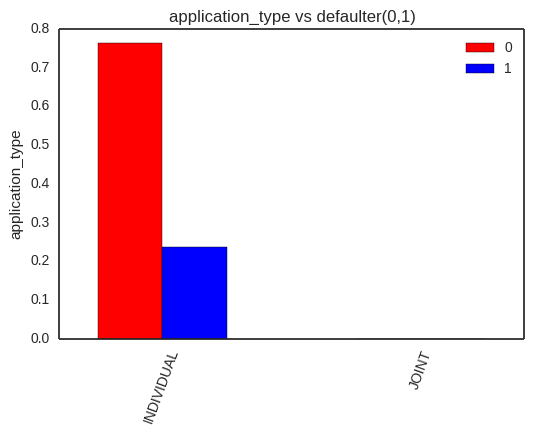

In [863]:
plot_bar('application_type')

In [864]:
print group('application_type')
print 
pivot('application_type')

  application_type  loan_status
0       INDIVIDUAL     0.236460
1            JOINT     0.003279



loan_status,0,1
application_type,,
INDIVIDUAL,406297,125826
JOINT,304,1


In [865]:
### encode directly
df_duo = dummy_it_simple(df_duo,'application_type')

In [866]:
df_duo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 56 columns):
acc_now_delinq                         887350 non-null float64
addr_state                             887379 non-null object
annual_inc                             887375 non-null float64
batch_enrolled                         756631 non-null object
collection_recovery_fee                887379 non-null float64
collections_12_mths_ex_med             887234 non-null float64
delinq_2yrs                            887350 non-null float64
desc                                   125781 non-null object
dti                                    887379 non-null float64
emp_title                              835922 non-null object
funded_amnt                            887379 non-null int64
funded_amnt_inv                        887379 non-null float64
grade                                  887379 non-null object
initial_list_status                    887379 non-null object
inq_last_6mths 

# for column = verification_status_joint

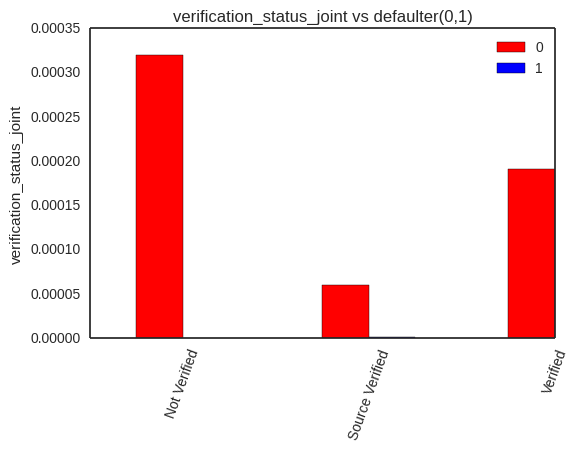

In [867]:
plot_bar('verification_status_joint')

In [868]:
print group('verification_status_joint')
print 
pivot('verification_status_joint')

  verification_status_joint  loan_status
1           Source Verified     0.030303
0              Not Verified     0.000000
2                  Verified     0.000000



loan_status,0,1
verification_status_joint,,
Not Verified,170.0,NaN
Source Verified,32.0,1.0
Verified,102.0,NaN


In [869]:
### drop it because of less size
df_duo.drop(['verification_status_joint'],axis=1,inplace=True)

# for column = 'last_week_pay

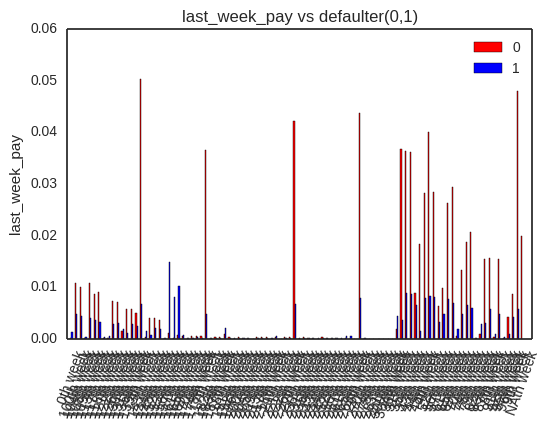

In [870]:
plot_bar('last_week_pay')

In [871]:
print group('last_week_pay')
print 
pivot('last_week_pay')

   last_week_pay  loan_status
39    205th week     1.000000
69    304th week     1.000000
68    300th week     1.000000
67    291th week     1.000000
66    283th week     1.000000
43    218th week     1.000000
64    274th week     1.000000
45    221th week     1.000000
22    157th week     0.991506
60    265th week     0.978814
23    161th week     0.932119
21    156th week     0.927681
20    153th week     0.920000
58    257th week     0.909091
63    270th week     0.900000
59    261th week     0.884328
0       0th week     0.869671
3     108th week     0.866310
16    143th week     0.864353
53    243th week     0.857143
93     92th week     0.841667
8     121th week     0.840580
49    230th week     0.823529
7     118th week     0.817391
91      8th week     0.805237
30    182th week     0.794118
87     79th week     0.790123
88     82th week     0.781586
35    192th week     0.777778
83     69th week     0.769173
..           ...          ...
31    183th week     0.263941
6     117t

loan_status,0,1
last_week_pay,,
0th week,107.0,714.0
100th week,5742.0,2567.0
104th week,5350.0,2353.0
108th week,25.0,162.0
109th week,5756.0,2082.0
113th week,4608.0,1925.0
117th week,4776.0,1687.0
118th week,42.0,188.0
121th week,44.0,232.0


In [872]:
### drop it for now unable to understand it because of high variablilty
df_duo.drop(['last_week_pay'],axis=1,inplace=True)

# for column grade

In [873]:
print group('grade')
print 
pivot('grade')

  grade  loan_status
0     A     0.268879
1     B     0.263278
6     G     0.235952
3     D     0.217167
2     C     0.216408
5     F     0.209171
4     E     0.186893



loan_status,0,1
grade,,
A,65148,23959
B,112507,40206
C,115579,31920
D,65419,18148
E,34553,7942
F,10934,2892
G,2461,760


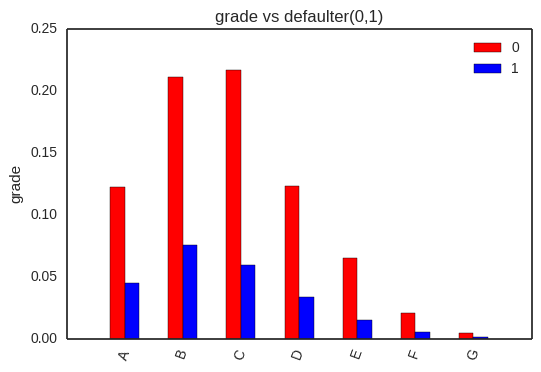

In [874]:
plot_bar('grade')

In [875]:
### encoding (a,b,g),(d,e,f),(c)
df_duo['Grade'] = df_duo['grade'].map({
    'A': 'high',
    'B': 'high',
    'G': 'high',
    'C' : 'C',
    'D': 'low',
    'E': 'low',
    'F': 'low',
})
df_duo = dummy_it(df_duo,'grade','Grade')

# for column emp_title

In [876]:
#plot_bar('emp_title')

In [877]:
# print group('emp_title')
# print 
# pivot('emp_title')

In [878]:
### drop it
df_duo.drop(['emp_title'],axis=1,inplace=True)

# for column pymnt_plan

In [879]:
print group('pymnt_plan')
print 
pivot('pymnt_plan')

  pymnt_plan  loan_status
1          y     0.250000
0          n     0.236327



loan_status,0,1
pymnt_plan,,
n,406595,125825
y,6,2


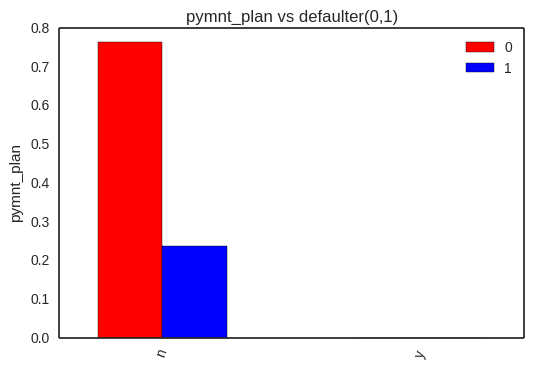

In [880]:
plot_bar('pymnt_plan')

In [881]:
### encode directly
df_duo = dummy_it_simple(df_duo,'pymnt_plan')

# for column title

In [882]:
# print group('title')
# print 
# pivot('title')

In [883]:
# drop it for now
df_duo.drop(['title'],axis=1,inplace=True)

# for column = zip_code

In [884]:
# print group('zip_code')
# print 
# pivot('zip_code')

In [885]:
# drop it for now
df_duo.drop(['zip_code'],axis=1,inplace=True)

# for column= addr_state

In [886]:
print group('addr_state')
print 
pivot('addr_state')

   addr_state  loan_status
12         IA     0.714286
13         ID     0.571429
7          DC     0.309411
4          CA     0.277984
44         UT     0.275790
11         HI     0.269131
0          AK     0.266716
47         WA     0.259259
37         OR     0.257291
5          CO     0.255586
26         MT     0.253074
19         MA     0.252887
45         VA     0.249716
3          AZ     0.249188
41         SD     0.247479
50         WY     0.246244
33         NV     0.242846
20         MD     0.240783
30         NH     0.240654
34         NY     0.236567
31         NJ     0.235885
39         RI     0.234281
10         GA     0.233287
9          FL     0.231360
23         MN     0.230657
27         NC     0.230624
43         TX     0.229619
18         LA     0.229537
49         WV     0.228298
24         MO     0.227454
32         NM     0.227181
40         SC     0.226820
17         KY     0.225486
48         WI     0.225291
6          CT     0.223282
1          AL     0.221078
1

loan_status,0,1
addr_state,,
AK,987,359
AL,5218,1481
AR,3121,867
AZ,9250,3070
CA,56253,21658
CO,8362,2871
CT,6272,1803
DC,1020,457
DE,1180,332


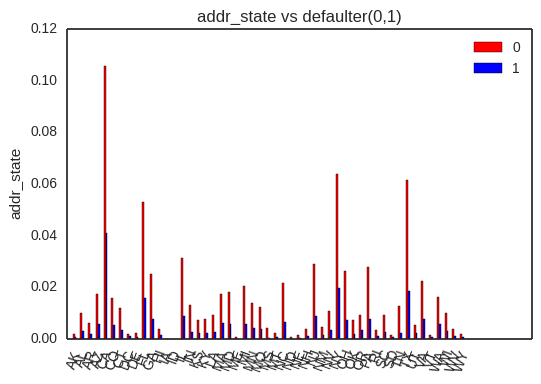

In [887]:
plot_bar('addr_state')

In [888]:
### simple encode it
# df_duo = dummy_it_simple(df_duo,'addr_state')
df_duo.drop(['addr_state'],axis=1,inplace=True)

# for column initial_list_status

In [889]:
print group('initial_list_status')
print 
pivot('initial_list_status')

  initial_list_status  loan_status
0                   f     0.330993
1                   w     0.135943



loan_status,0,1
initial_list_status,,
f,183320,90698
w,223281,35129


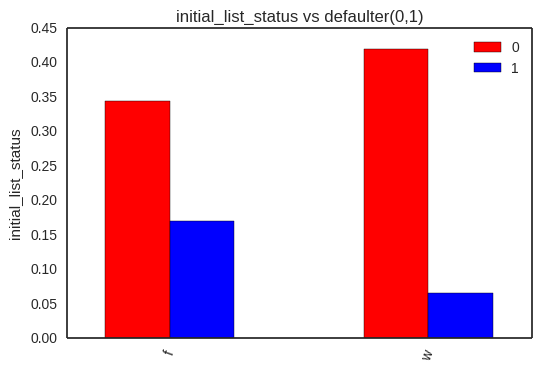

In [890]:
plot_bar('initial_list_status')

In [891]:
### encode directly
df_duo = dummy_it_simple(df_duo,'initial_list_status')

# for column = batch_enrolled

In [892]:
#### drop it low data
df_duo.drop(['batch_enrolled'],axis=1,inplace=True)

# for column = sub_grade

In [893]:
#### drop it low data
df_duo.drop(['sub_grade'],axis=1,inplace=True)

# for column = desc

In [894]:
#### drop it low data
df_duo.drop(['desc'],axis=1,inplace=True)

In [895]:
df_duo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 51 columns):
acc_now_delinq                         887350 non-null float64
annual_inc                             887375 non-null float64
collection_recovery_fee                887379 non-null float64
collections_12_mths_ex_med             887234 non-null float64
delinq_2yrs                            887350 non-null float64
dti                                    887379 non-null float64
funded_amnt                            887379 non-null int64
funded_amnt_inv                        887379 non-null float64
inq_last_6mths                         887350 non-null float64
int_rate                               887379 non-null float64
loan_amnt                              887379 non-null int64
loan_status                            532428 non-null float64
member_id                              887379 non-null int64
mths_since_last_delinq                 433067 non-null float64
mths_since_la

# for int and float features only correleation applicable

In [896]:
### heatmap for high features
# heatMap(df_train,"high")

In [897]:
#### for medium and null
# cols = df[(df.expectations=="medium") | (df.expectations=='null')].feature
# print df_train[cols].describe(include=['O'])
### heatmap of medium and null 
# heatMap(df_train,"medium",'null')

In [898]:
# print df_train['loan_status'].describe()
# df_train.loan_status.sum()/532428.0

In [899]:
### low feature
# heatMap(df_train,'low')

In [900]:
# # #### finding correleation b/w float and int features
# def find_relatives():
#     df = get_train_test().drop(['loan_status','member_id'],axis=1)
#     cols = [col for col in list(df.columns) if df[col].dtype=='int' or df[col].dtype=='float']
#     corrmat = df[cols].corr()
#     f, ax = plt.subplots(figsize=(18, 9))
#     sns.heatmap(corrmat, square=True)
#     plt.show()
#     return
# find_relatives()

# for int and float feature engineering and selection

# for column = collection_recovery_fee

In [901]:
print df['collection_recovery_fee'].describe()
freq(df,'collection_recovery_fee')

count    532428.000000
mean          4.859221
std          63.123361
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64
max 7002.19
min 0.0


0.0000      518423
2.0000          13
2.7300          10
3.0900           9
1.8000           9
3.7100           9
1.5500           8
2.5200           8
2.6100           7
1.4500           7
4.0000           7
3.5500           7
0.9300           7
2.4600           7
1.5600           7
1.3000           7
1.8800           7
3.3500           7
3.0100           7
1.2000           7
3.0500           7
1.2100           7
1.4400           7
4.7800           6
5.6700           6
1.1600           6
3.2300           6
3.9300           6
4.8700           6
4.1600           6
             ...  
12.3399          1
12.0207          1
14.2029          1
77.7240          1
300.9816         1
378.0234         1
851.2038         1
10.4284          1
211.3110         1
288.1674         1
33.0158          1
22.1846          1
15.1165          1
10.6140          1
60.5582          1
10.8876          1
228.9658         1
5.5810           1
7.4499           1
646.1154         1
659.1132         1
980.3754    

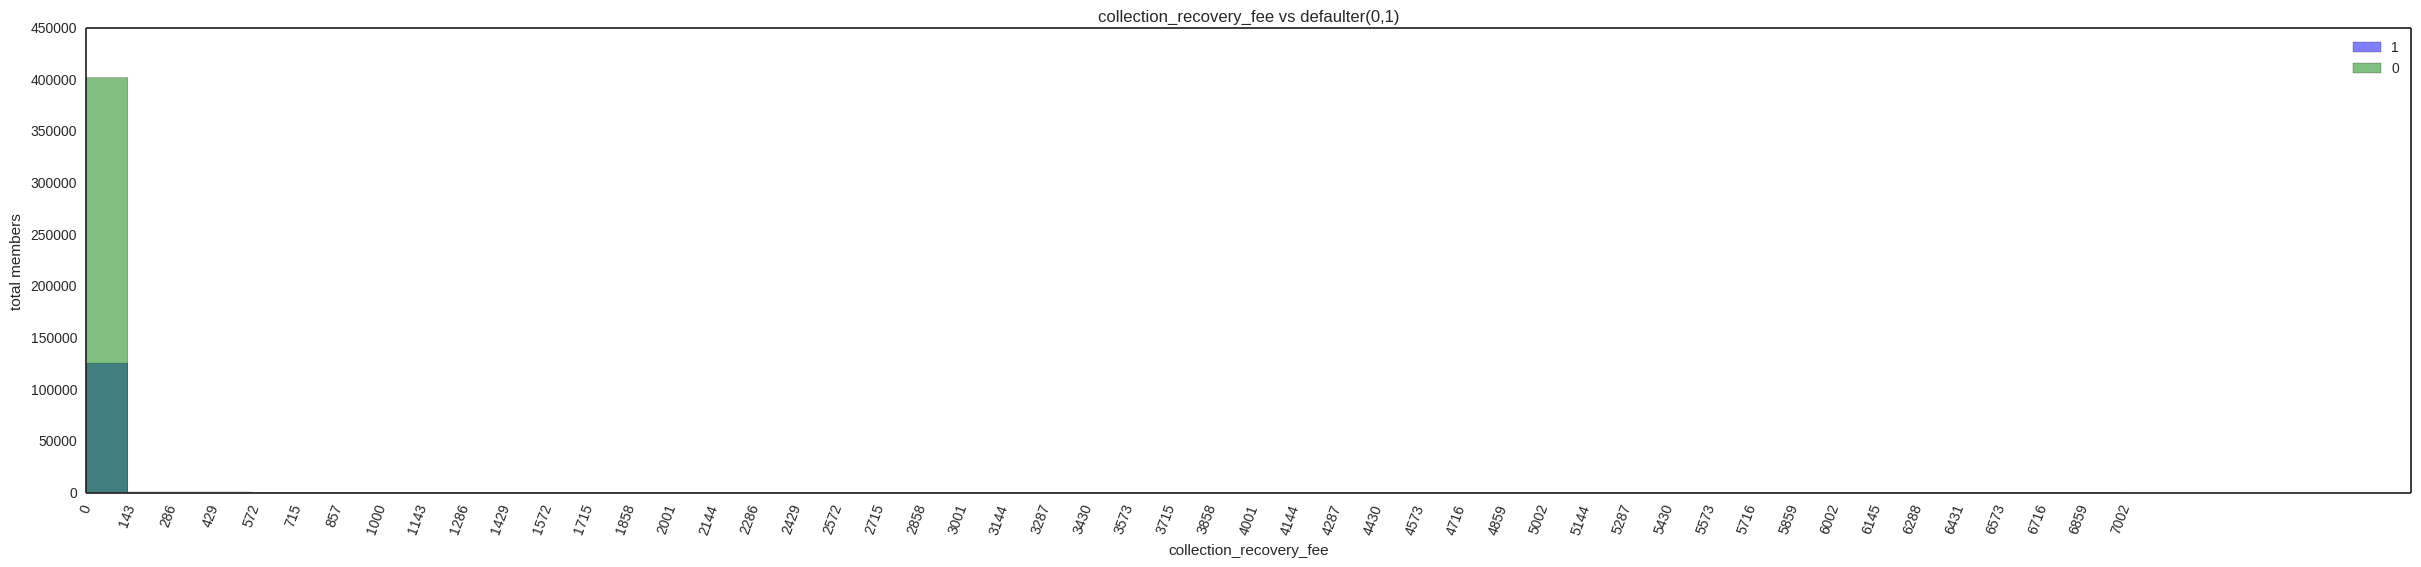

In [902]:
## 
plot_hist(df,'collection_recovery_fee',50)

In [903]:
# plot_boxes(df,'collection_recovery_fee')

In [904]:
### drop column collection_recovery_fee
df_duo.drop(['collection_recovery_fee'],axis=1,inplace=True)

# for column = recoveries

In [905]:
print df['recoveries'].describe()
freq(df,'recoveries')

count    532428.000000
mean         45.717832
std         409.647467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64
max 33520.27
min 0.0


0.00       517723
200.00          7
11.70           6
10.08           5
3000.00         5
13.20           5
10.20           5
1200.00         5
13.50           5
800.00          5
5000.00         5
10.92           5
10.66           5
16.80           5
11.20           5
2500.00         5
100.00          5
14.28           5
20.16           4
12.80           4
10.40           4
16.50           4
10.56           4
2000.00         4
19.20           4
11.68           4
13.93           4
11.16           4
12.42           4
11.60           4
            ...  
793.62          1
18.12           1
1007.61         1
229.06          1
4020.69         1
4628.03         1
1391.92         1
1345.00         1
2020.15         1
15.26           1
2311.87         1
2768.42         1
331.77          1
12.58           1
21.00           1
793.13          1
2535.88         1
1508.41         1
162.62          1
23.56           1
6.31            1
1946.90         1
3660.04         1
1389.42         1
376.21    

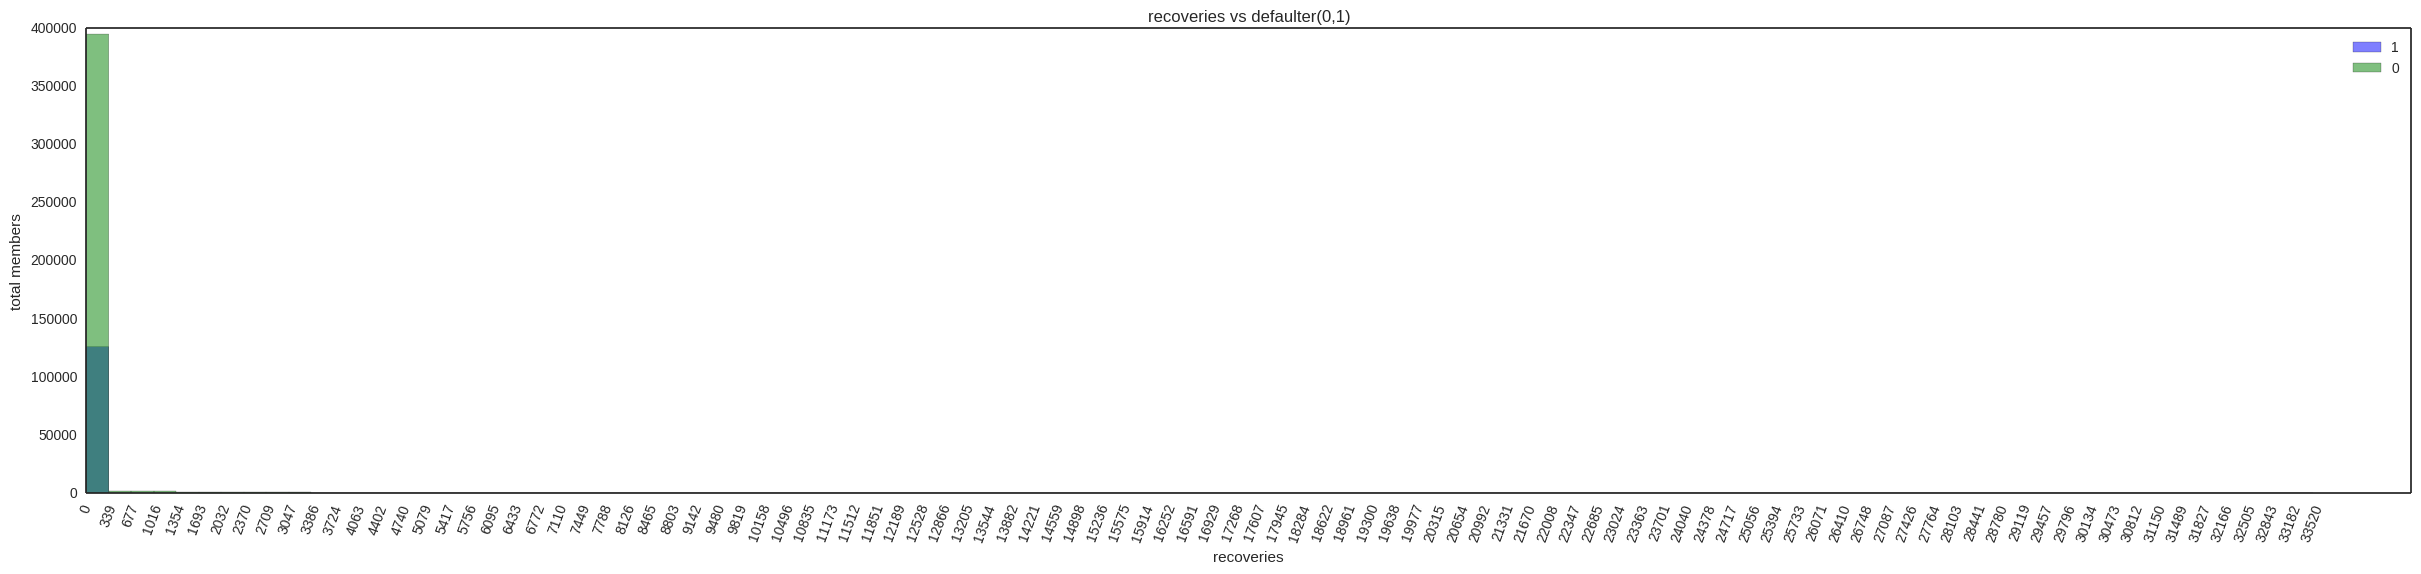

In [906]:
plot_hist(df,'recoveries',100)

In [907]:
# plot_boxes(df,'recoveries')

In [908]:
def transform_recoveries(item):
    if item==0:
        return 'high0'
    else:
        return 'low'

df_duo['recovery'] = df_duo['recoveries'].map(transform_recoveries)
df_duo = dummy_it(df_duo,'recoveries','recovery')

# for column = delinq_2yrs


In [909]:
descp(df,'delinq_2yrs')

count    532412.000000
mean          0.314448
std           0.860045
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: delinq_2yrs, dtype: float64
max 30.0
min 0.0


0.0     430104
1.0      67947
2.0      20167
3.0       7269
4.0       3159
5.0       1622
6.0        898
7.0        451
8.0        266
9.0        166
10.0       116
11.0        73
12.0        61
13.0        37
14.0        28
15.0        14
16.0         9
18.0         8
17.0         6
19.0         4
21.0         2
30.0         1
22.0         1
26.0         1
27.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

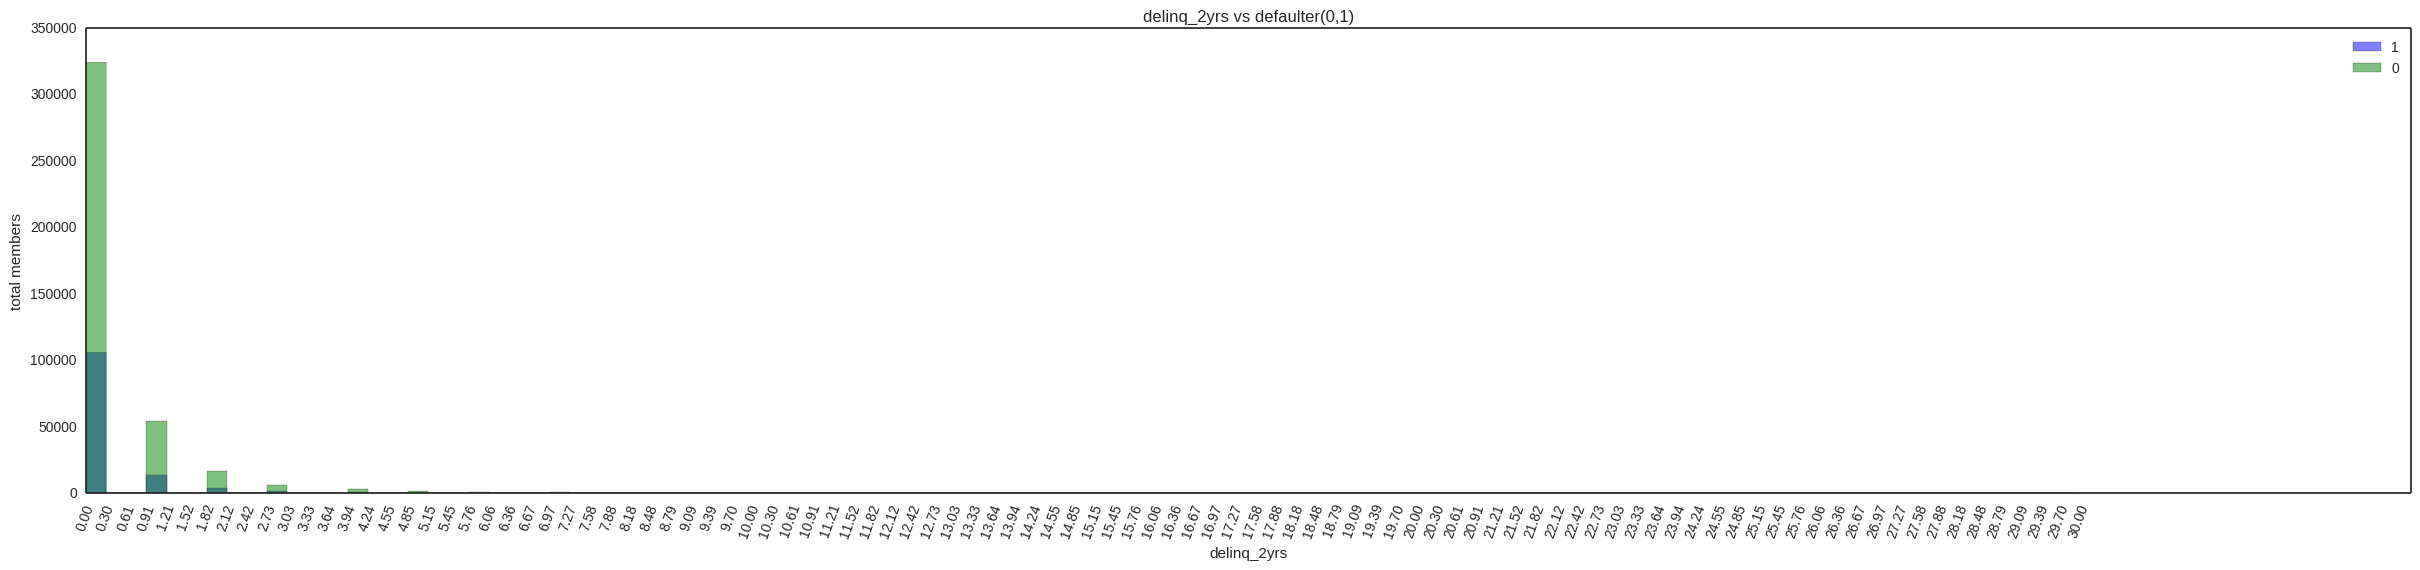

In [910]:
plot_hist(df,'delinq_2yrs',100)

In [911]:
# plot_boxes(df,'delinq_2yrs')

In [912]:
def transform_delinq_2yrs(item):
    if item==0:
        return '0'
    elif item==1:
        return '1'
    elif item==2:
        return '2'
    else :
        return '3_'


print df_duo[df_duo.delinq_2yrs>20].index
df_duo.drop( df_duo[ (df_duo.delinq_2yrs>20) & (df_duo.delinq_2yrs==0)].index,inplace=True )
df_duo['delinq'] = df_duo['delinq_2yrs'].map(transform_delinq_2yrs)
df_duo = dummy_it(df_duo,'delinq_2yrs','delinq')

Int64Index([ 38863, 159308, 216537, 224741, 276260, 445164, 516461, 565467,
            590342, 614328, 644571, 650685],
           dtype='int64')


# for column = mths_since_last_delinq

In [913]:
descp(df,'mths_since_last_delinq')

count    259874.000000
mean         34.055735
std          21.884797
min           0.000000
25%          15.000000
50%          31.000000
75%          50.000000
max         180.000000
Name: mths_since_last_delinq, dtype: float64
max 180.0
min 0.0


9.0      5163
6.0      5125
12.0     5037
7.0      5032
13.0     5017
8.0      4988
10.0     4933
15.0     4818
14.0     4812
11.0     4730
16.0     4539
17.0     4508
18.0     4462
19.0     4411
21.0     4332
22.0     4315
20.0     4191
23.0     4190
5.0      4167
25.0     4122
24.0     4103
26.0     4088
27.0     4039
29.0     4028
28.0     4025
30.0     3888
33.0     3870
31.0     3843
32.0     3738
34.0     3688
         ... 
135.0       2
134.0       2
141.0       2
118.0       2
129.0       2
109.0       2
127.0       2
111.0       2
152.0       2
117.0       2
113.0       2
98.0        2
107.0       2
170.0       2
126.0       1
124.0       1
130.0       1
180.0       1
148.0       1
154.0       1
171.0       1
159.0       1
136.0       1
142.0       1
143.0       1
146.0       1
176.0       1
151.0       1
119.0       1
123.0       1
Name: mths_since_last_delinq, dtype: int64

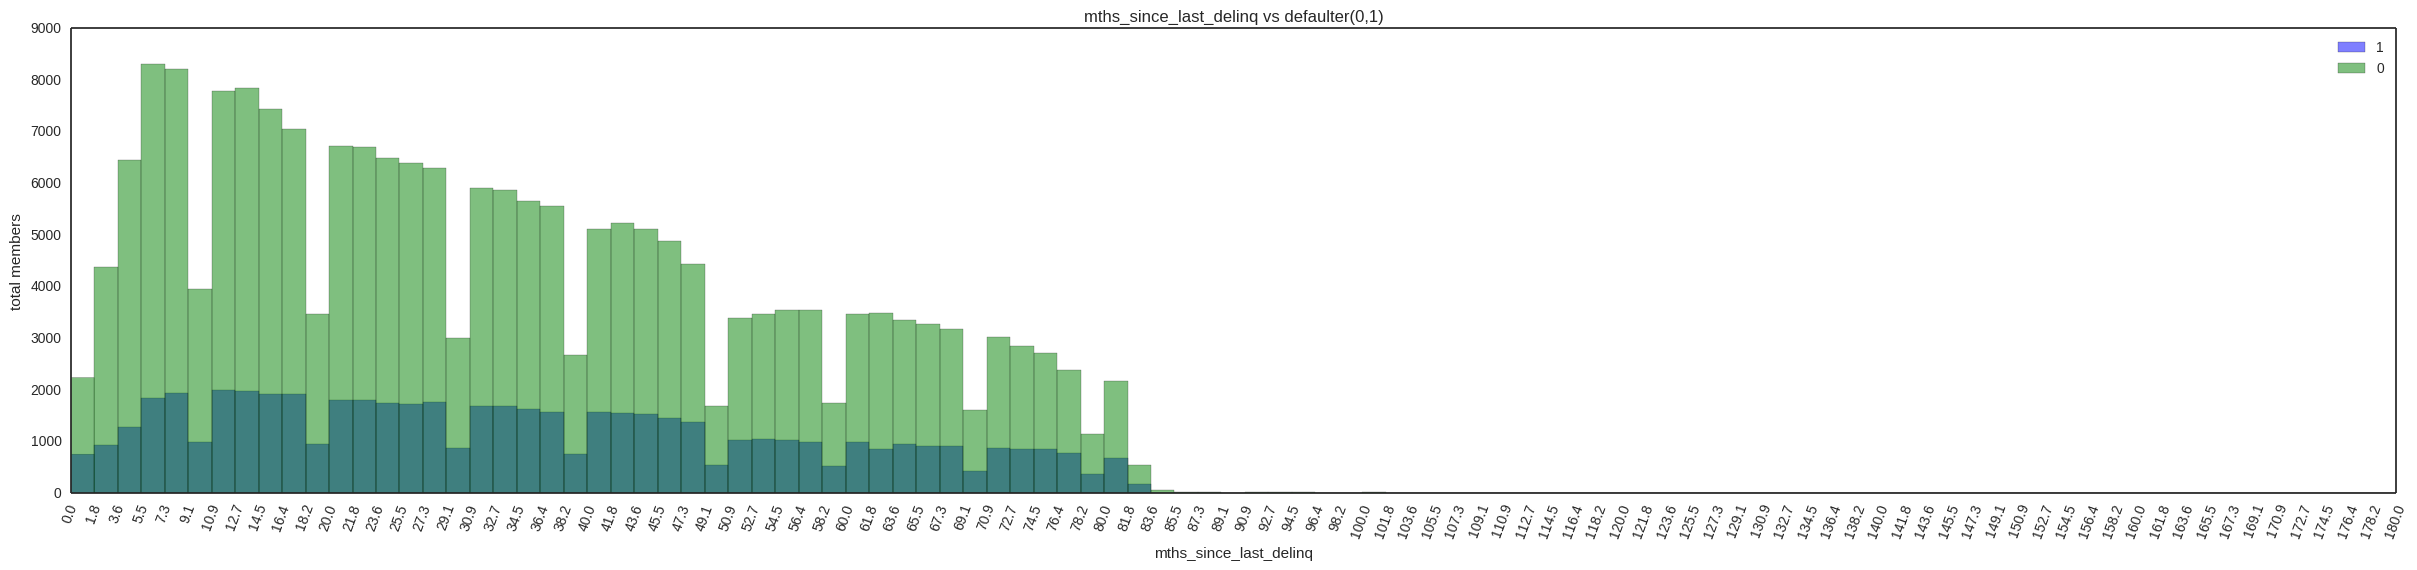

In [914]:
plot_hist(df,'mths_since_last_delinq',100)

In [915]:
# plot_boxes(df,'mths_since_last_delinq')

# for column = mths_since_last_major_derog

In [916]:
print df['mths_since_last_major_derog'].describe()
freq(df,'mths_since_last_major_derog')

count    132980.000000
mean         44.121462
std          22.198410
min           0.000000
25%          27.000000
50%          44.000000
75%          61.000000
max         180.000000
Name: mths_since_last_major_derog, dtype: float64
max 180.0
min 0.0


45.0     2104
46.0     2092
42.0     2062
43.0     2042
37.0     2015
48.0     1995
38.0     1994
44.0     1984
40.0     1979
47.0     1955
36.0     1950
41.0     1947
29.0     1925
39.0     1924
49.0     1923
28.0     1907
31.0     1904
33.0     1896
58.0     1895
32.0     1892
26.0     1880
35.0     1877
61.0     1871
60.0     1868
64.0     1865
34.0     1862
56.0     1851
57.0     1846
62.0     1844
63.0     1835
         ... 
132.0      15
128.0      15
135.0      14
129.0      14
125.0      13
139.0      12
142.0      12
131.0      11
143.0      11
136.0      10
138.0      10
146.0       8
148.0       8
140.0       7
145.0       6
147.0       5
151.0       5
149.0       4
152.0       4
144.0       4
150.0       3
159.0       2
170.0       2
153.0       2
154.0       2
176.0       1
180.0       1
162.0       1
171.0       1
165.0       1
Name: mths_since_last_major_derog, dtype: int64

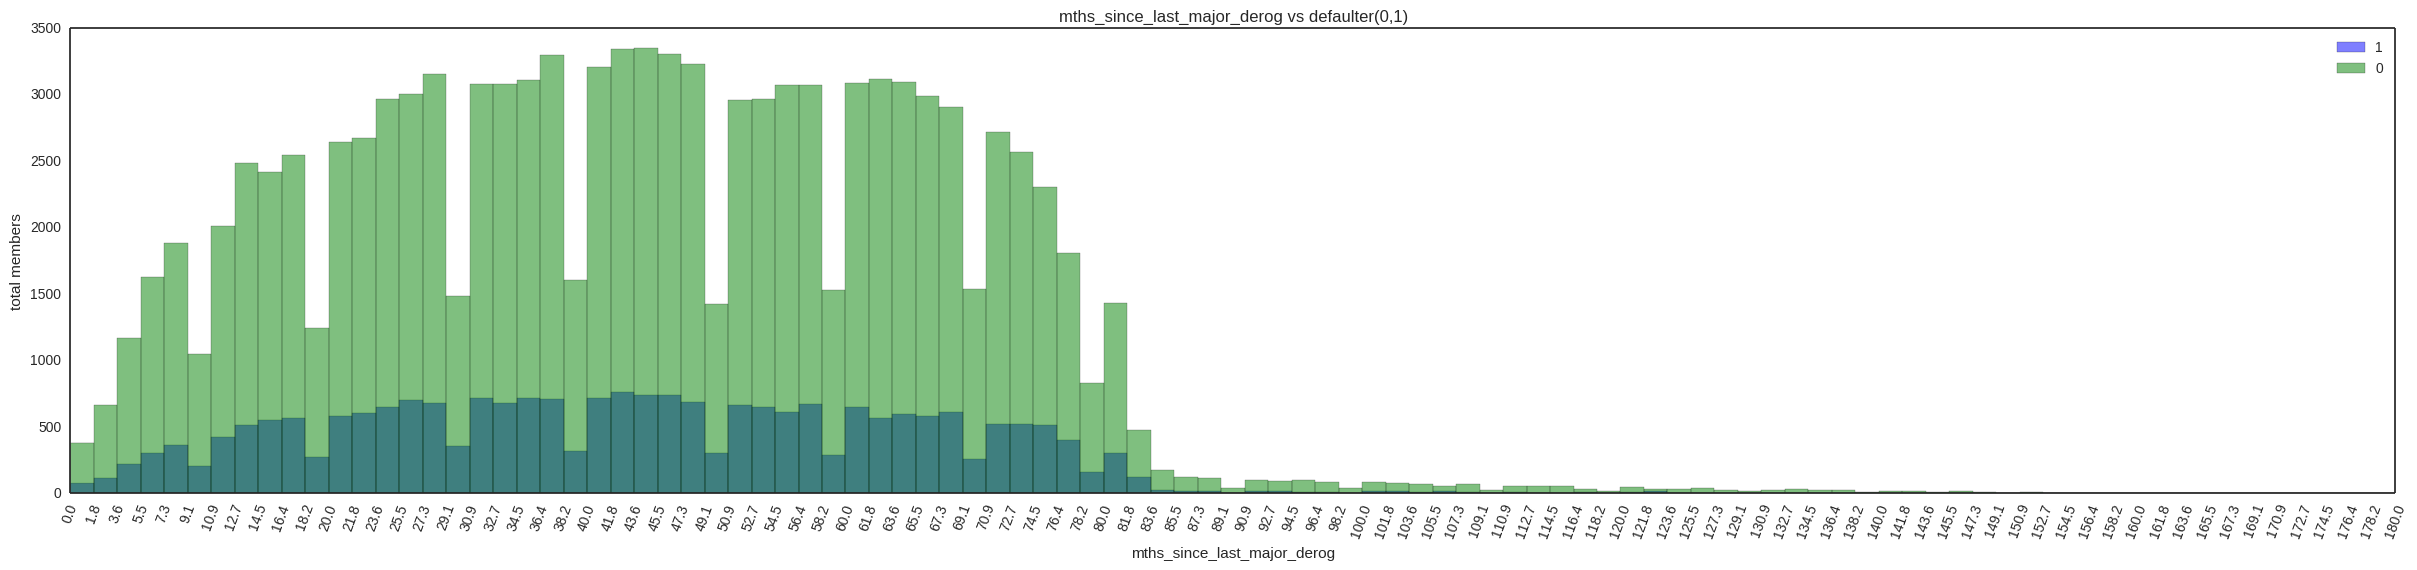

In [917]:
plot_hist(df,'mths_since_last_major_derog',100)

In [918]:
# plot_boxes(df,'mths_since_last_major_derog')

In [919]:
df_duo.drop(['mths_since_last_major_derog','mths_since_last_delinq'],axis=1,inplace=True)

# for column = funded_amnt

In [920]:
descp(df,'funded_amnt')

count    532428.000000
mean      14744.271291
std        8429.139277
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64
max 35000
min 500


10000    37118
12000    30069
15000    28345
20000    28085
35000    21650
8000     16656
5000     16275
6000     15624
25000    14271
16000    14165
24000    13395
18000    13283
30000    10579
28000     8858
7000      8585
14000     7964
21000     7241
9000      6715
4000      6259
3000      5811
13000     4588
11000     4500
9600      4118
7200      3913
17000     3452
14400     3380
7500      3244
22000     3198
2000      3056
4800      2590
         ...  
31425        4
33125        4
33450        4
31925        4
34125        3
700          3
1425         3
34700        3
600          3
30425        3
32850        3
29075        3
34325        3
34275        3
32525        3
32925        2
33625        2
32575        2
31125        2
34175        2
30325        2
850          1
925          1
800          1
550          1
900          1
32050        1
34600        1
725          1
750          1
Name: funded_amnt, dtype: int64

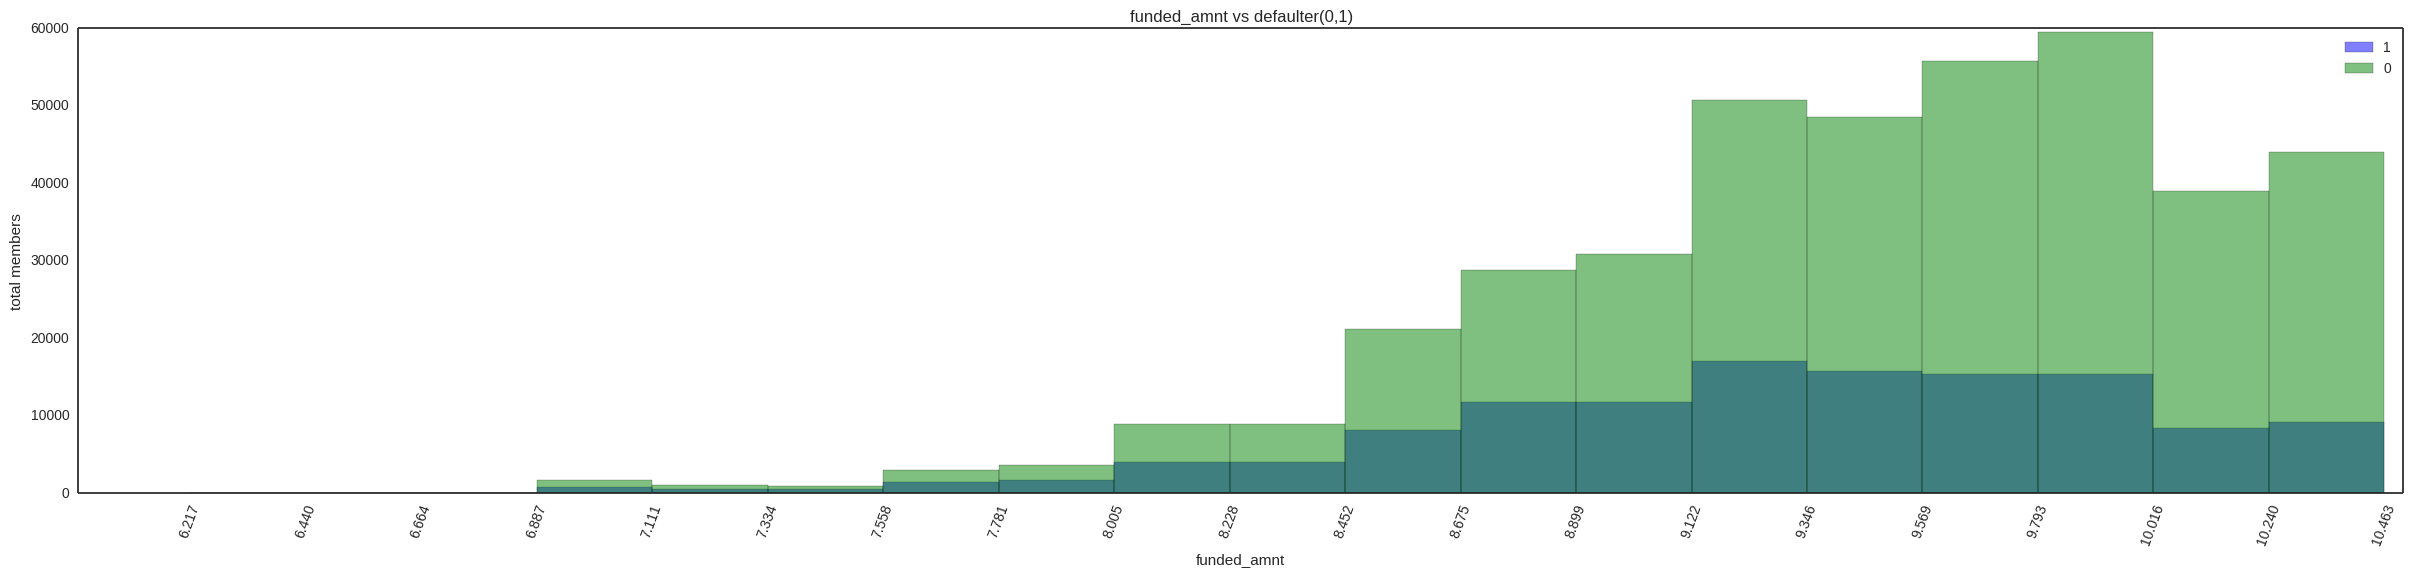

In [921]:
plot_hist(df,'funded_amnt',20,True)

In [922]:
# plot_boxes(df,'funded_amnt')

# for column = loan_amnt

In [923]:
print df['loan_amnt'].describe()
freq(df,'loan_amnt')

count    532428.000000
mean      14757.595722
std        8434.420080
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64
max 35000
min 500


10000    37175
12000    30126
15000    28420
20000    28196
35000    21728
8000     16661
5000     16285
6000     15631
25000    14433
16000    14216
24000    13457
18000    13326
30000    10608
28000     8866
7000      8591
14000     7977
21000     7256
9000      6722
4000      6258
3000      5818
13000     4594
11000     4500
9600      4122
7200      3916
17000     3465
14400     3387
7500      3284
22000     3207
2000      3055
4800      2588
         ...  
34825        4
32125        4
33450        4
31925        4
34125        3
32525        3
700          3
1425         3
30425        3
600          3
34700        3
32850        3
34275        3
34325        3
29075        3
33625        2
32925        2
31125        2
34175        2
30325        2
32575        2
850          1
750          1
550          1
800          1
925          1
32050        1
34600        1
900          1
725          1
Name: loan_amnt, dtype: int64

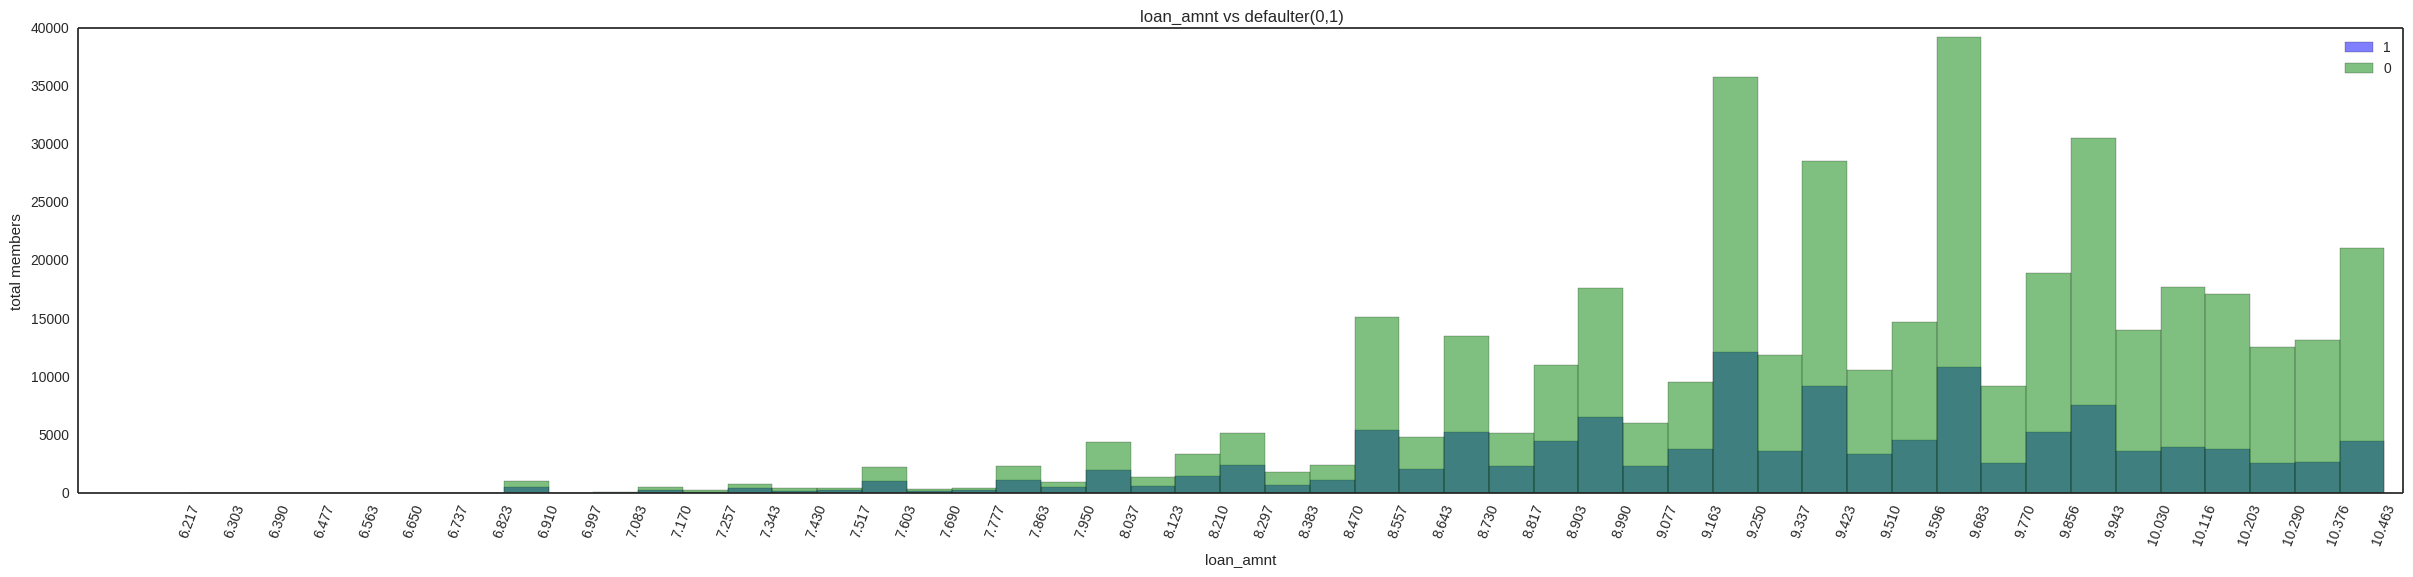

In [924]:
plot_hist(df,'loan_amnt',50,True)

In [925]:
# plot_boxes(df,'loan_amnt')

# for column = funded_amnt_inv

In [926]:
print df['funded_amnt_inv'].describe()
freq(df,'funded_amnt_inv')

count    532428.000000
mean      14704.926696
std        8441.290381
min           0.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt_inv, dtype: float64
max 35000.0
min 0.0


10000.000000    33676
12000.000000    26981
15000.000000    25025
20000.000000    24198
35000.000000    17671
8000.000000     15455
5000.000000     15294
6000.000000     14723
16000.000000    12409
25000.000000    12067
18000.000000    11620
24000.000000    11488
30000.000000     8756
7000.000000      7967
28000.000000     7705
14000.000000     7024
21000.000000     6261
9000.000000      6111
4000.000000      5880
3000.000000      5531
11000.000000     4095
13000.000000     4075
9600.000000      3771
7200.000000      3665
17000.000000     3031
14400.000000     2995
2000.000000      2964
7500.000000      2924
22000.000000     2723
4800.000000      2452
                ...  
19533.780000        1
6975.004068         1
14851.416234        1
9968.665166         1
5988.923775         1
13954.900000        1
19762.112830        1
8640.053392         1
27994.374664        1
5190.780000         1
13796.590000        1
6986.174217         1
23664.715248        1
8424.850915         1
1171.24783

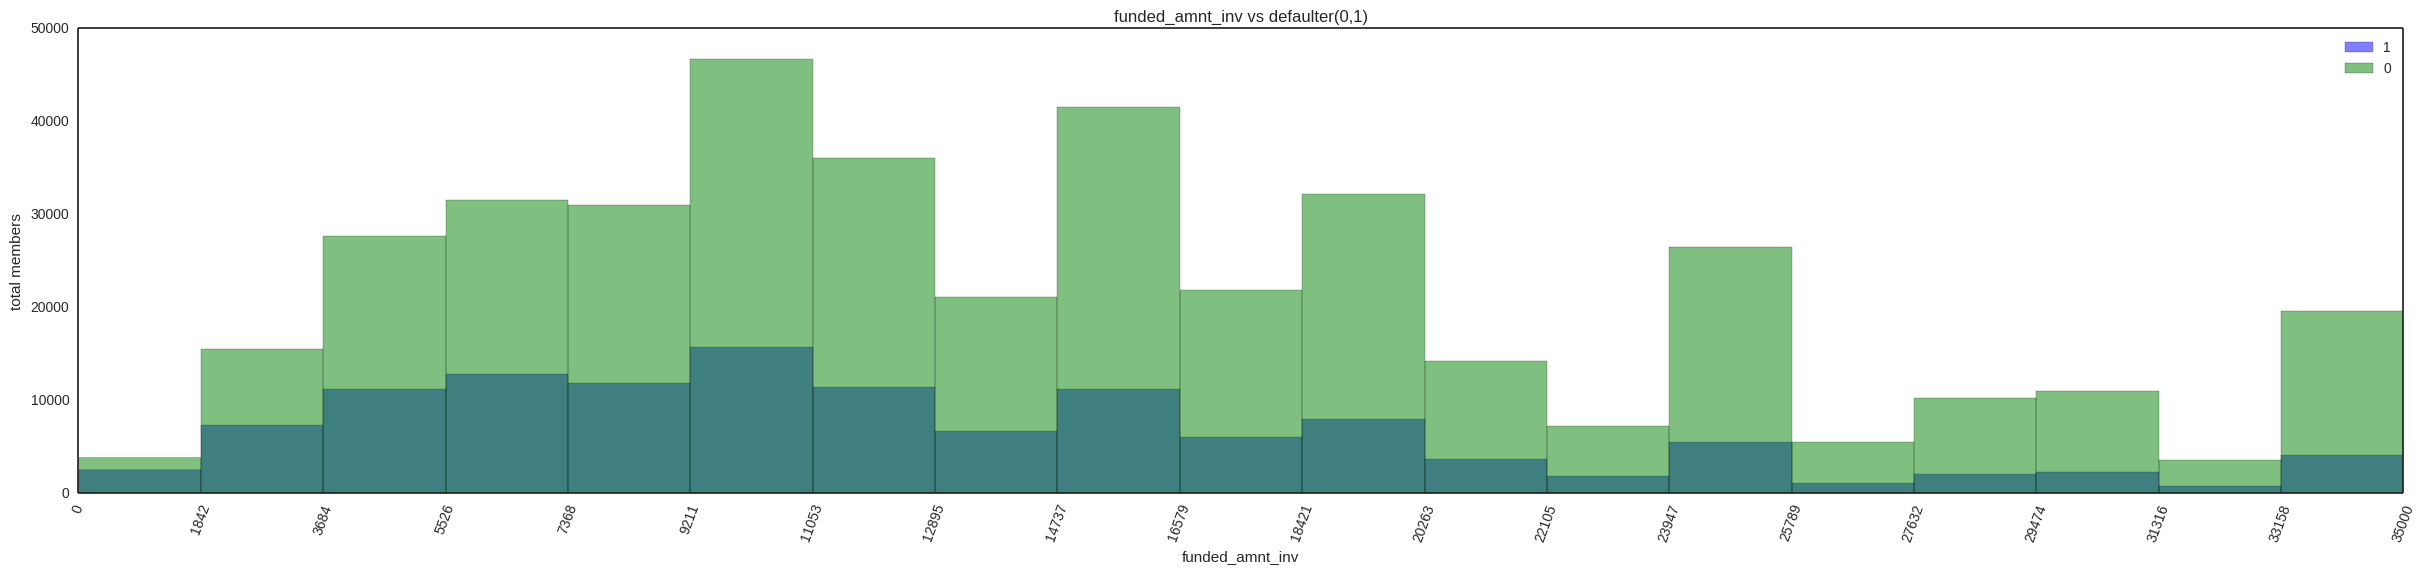

In [927]:
plot_hist(df,'funded_amnt_inv',20)

In [928]:
# plot_boxes(df,'funded_amnt_inv')

# for column = sanc

In [929]:
df_duo['sanc'] = (df_duo['funded_amnt'] + df_duo['funded_amnt_inv']).div(2)
df_duo = log_it(df_duo,'sanc')

In [930]:
df_duo.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

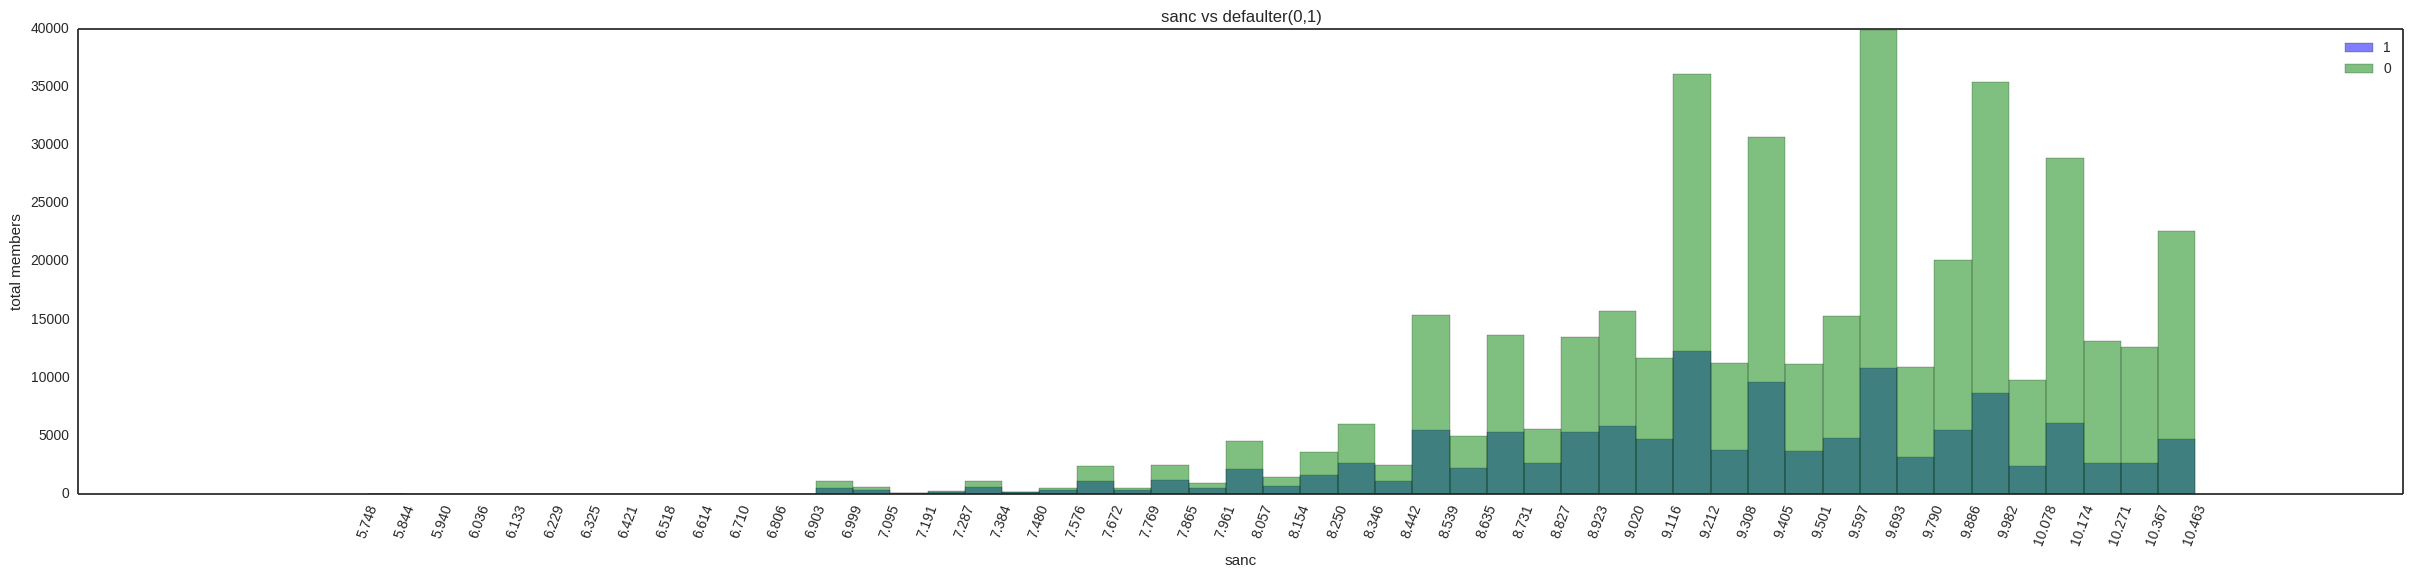

In [931]:
plot_hist(df_duo,'sanc',50)

# for column = 'open_acc'

In [932]:
print df['open_acc'].describe()
freq(df,'open_acc')

count    532412.000000
mean         11.545594
std           5.311442
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64
max 90.0
min 0.0


9.0     48345
10.0    47212
8.0     46065
11.0    43384
7.0     40501
12.0    38666
13.0    33986
6.0     33532
14.0    28771
5.0     23935
15.0    23733
16.0    20072
17.0    16360
4.0     13991
18.0    13336
19.0    10927
20.0     8679
21.0     6917
3.0      5741
22.0     5562
23.0     4490
24.0     3510
25.0     2851
26.0     2054
2.0      1654
27.0     1650
28.0     1277
29.0     1026
30.0      794
31.0      618
        ...  
45.0       30
44.0       27
48.0       25
46.0       23
49.0       16
47.0       15
50.0       13
51.0       11
53.0       10
55.0        5
0.0         4
52.0        3
58.0        3
59.0        2
54.0        2
76.0        1
60.0        1
79.0        1
64.0        1
57.0        1
62.0        1
63.0        1
84.0        1
67.0        1
90.0        1
70.0        1
56.0        1
82.0        1
75.0        1
68.0        1
Name: open_acc, dtype: int64

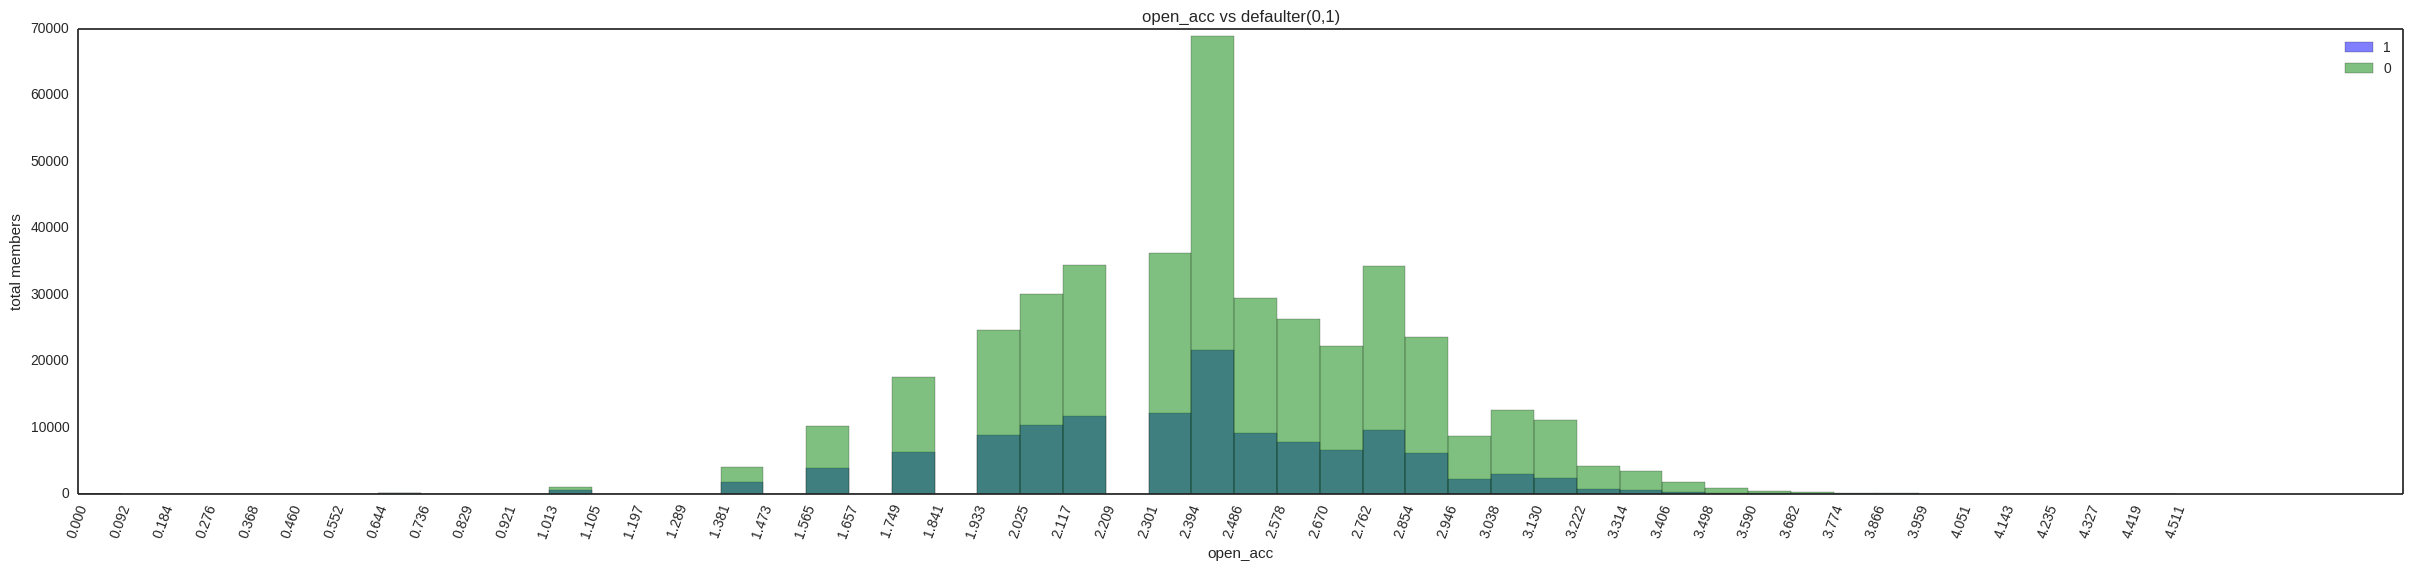

In [933]:
plot_hist(df,'open_acc',50,True)

In [934]:
# plot_boxes(df,'open_acc')

In [935]:
df_duo.drop(['open_acc'],axis=1,inplace=True)

# for column = total_acc

In [936]:
print df['total_acc'].describe()
freq(df,'total_acc')

count    532412.000000
mean         25.267357
std          11.843211
min           1.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         162.000000
Name: total_acc, dtype: float64
max 162.0
min 1.0


20.0     19338
22.0     19266
21.0     19099
19.0     19056
18.0     18738
23.0     18703
24.0     18623
17.0     18536
25.0     17846
16.0     17448
26.0     17369
15.0     16850
27.0     16421
28.0     15813
14.0     15709
29.0     14957
13.0     14850
30.0     14328
12.0     13366
31.0     13153
32.0     12597
11.0     11995
33.0     11471
34.0     10736
10.0     10492
35.0      9837
36.0      9235
9.0       8695
37.0      8489
38.0      7545
         ...  
95.0         7
97.0         6
102.0        5
99.0         5
101.0        3
113.0        2
100.0        2
110.0        2
111.0        2
104.0        2
107.0        2
98.0         2
124.0        2
112.0        2
162.0        1
156.0        1
129.0        1
130.0        1
126.0        1
116.0        1
135.0        1
119.0        1
138.0        1
109.0        1
140.0        1
117.0        1
114.0        1
103.0        1
106.0        1
127.0        1
Name: total_acc, dtype: int64

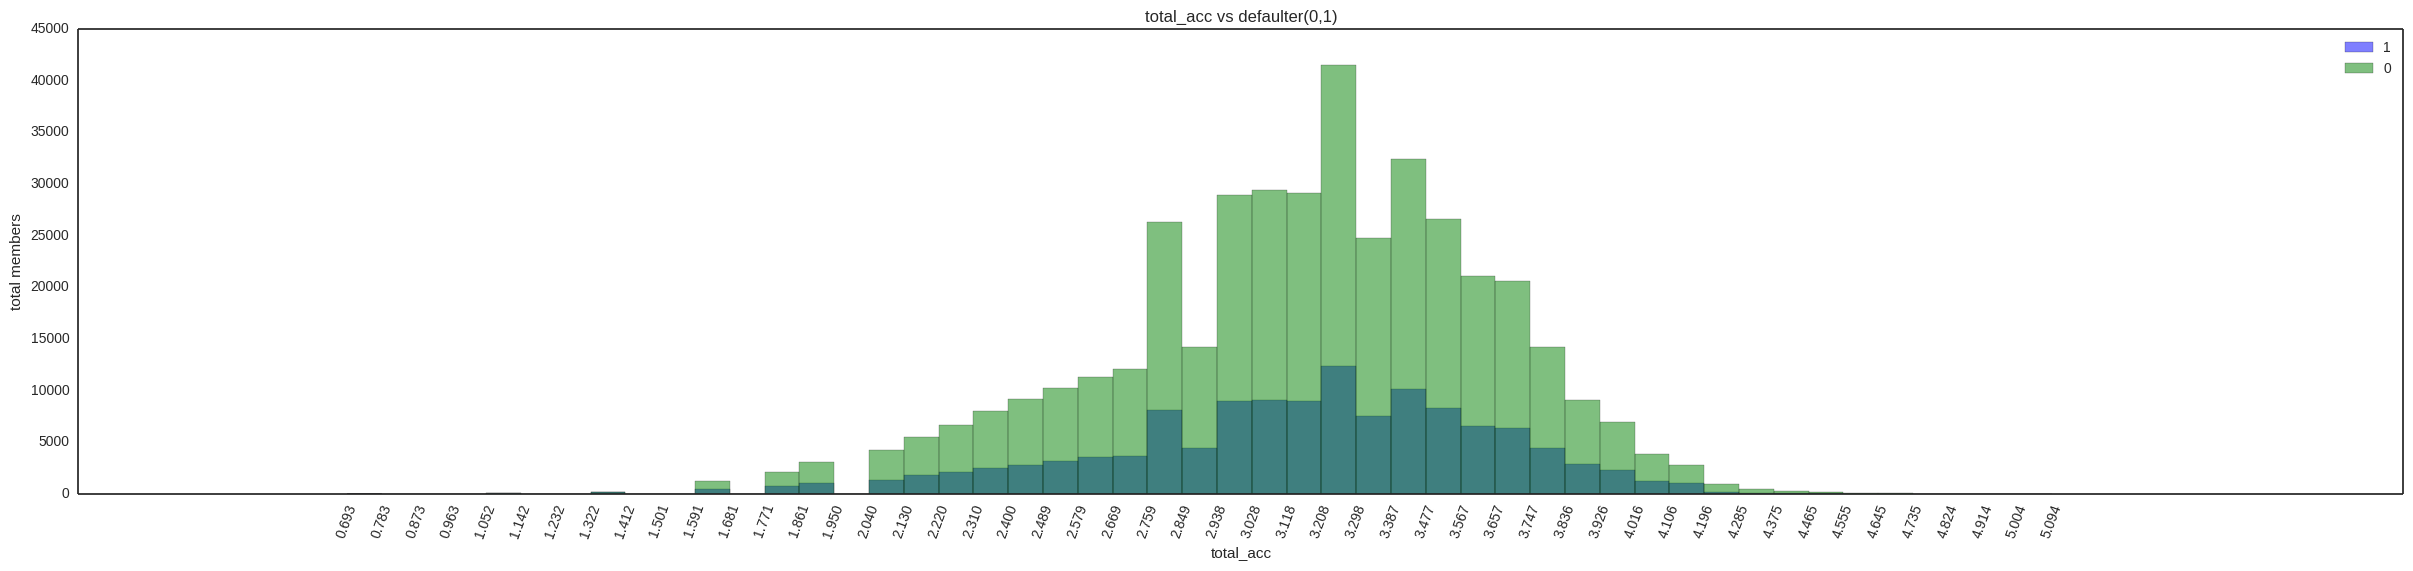

In [937]:
plot_hist(df,'total_acc',50,True)

In [938]:
# plot_boxes(df,'total_acc')

In [939]:
df_duo = log_it(df_duo,'total_acc')

# for column = revol_bal

In [940]:
print df['revol_bal'].describe()
freq(df,'revol_bal')

count    5.324280e+05
mean     1.692128e+04
std      2.242322e+04
min      0.000000e+00
25%      6.444000e+03
50%      1.187600e+04
75%      2.084300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64
max 2568995.0
min 0.0


0.0         2017
5235.0        52
5399.0        46
5466.0        45
5853.0        45
4136.0        44
7792.0        44
6189.0        44
5886.0        43
6052.0        43
7622.0        43
6040.0        43
6077.0        43
8643.0        43
10481.0       43
10218.0       42
5430.0        42
5917.0        42
6295.0        42
5730.0        42
7618.0        42
7110.0        42
4532.0        42
5919.0        42
4578.0        42
4479.0        42
3748.0        42
8703.0        41
6002.0        41
7046.0        41
            ... 
52698.0        1
97412.0        1
401825.0       1
100461.0       1
100527.0       1
210602.0       1
210455.0       1
100511.0       1
68996.0        1
52619.0        1
100505.0       1
401969.0       1
140000.0       1
35588.0        1
401946.0       1
52629.0        1
401941.0       1
52631.0        1
100481.0       1
68992.0        1
52633.0        1
52635.0        1
39448.0        1
116532.0       1
52641.0        1
52642.0        1
54096.0        1
52645.0       

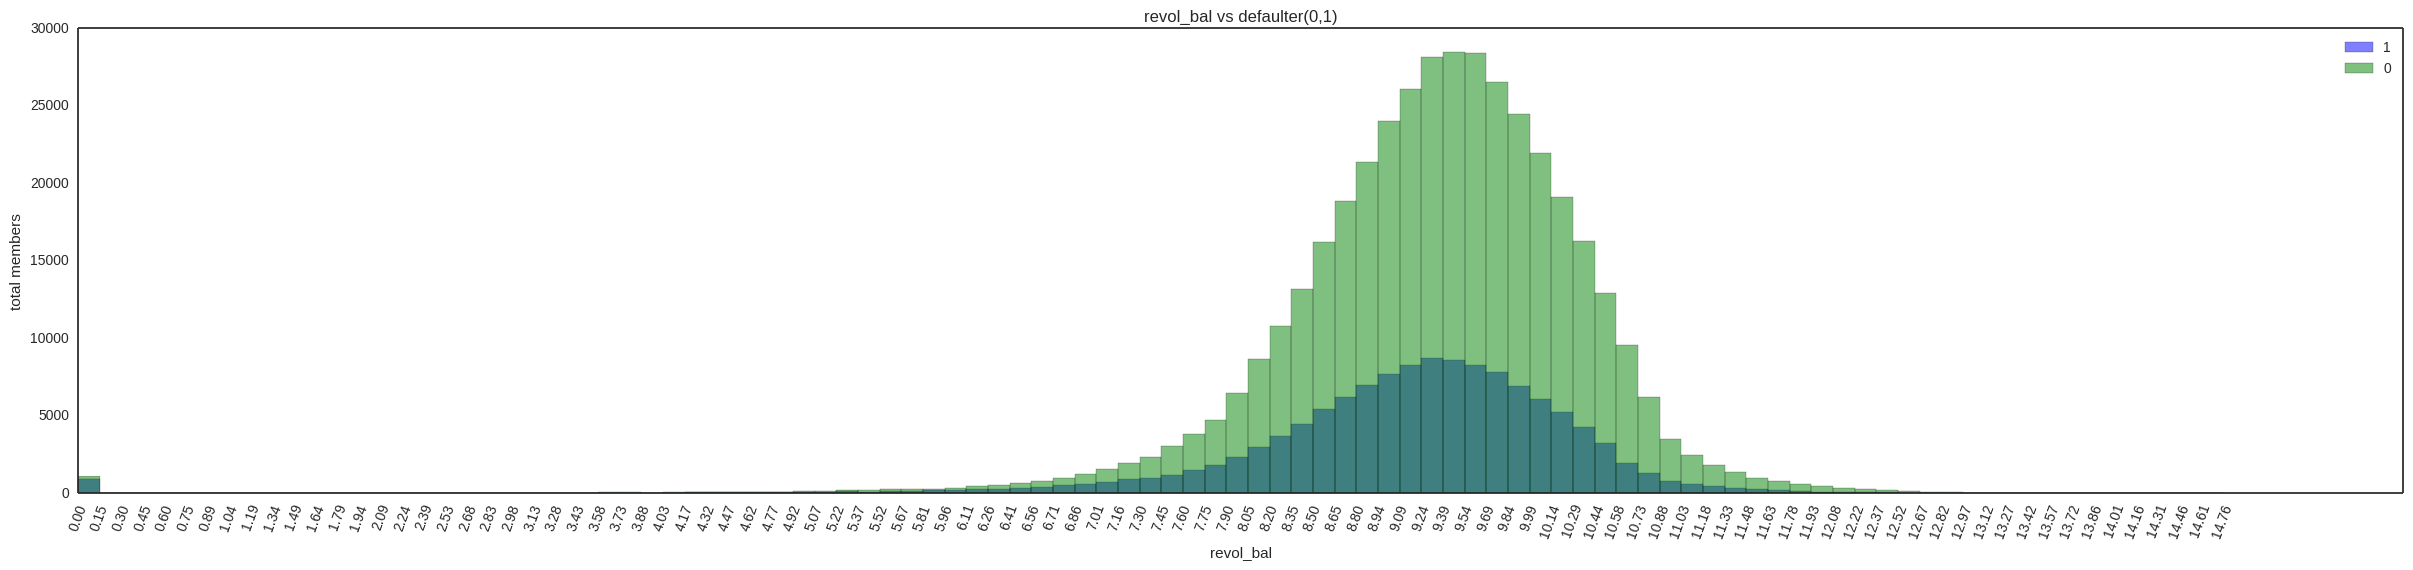

In [941]:
plot_hist(df,'revol_bal',100,True)

In [942]:
# plot_boxes(df,'revol_bal')

In [943]:
def transform_revol_bal(item):
    if item<=7.45:
        return 'high'
    elif item>7.45 and item<=10.88:
        return 'middle'
    else:
        return 'lowest'

print df_duo[ (df_duo.loan_status==1) & (df_duo.revol_bal>1000000) ].index
df_duo.drop( df_duo[ (df_duo.loan_status==1) & (df_duo.revol_bal>1000000) ].index,inplace=True )
print df_duo[ (df_duo.loan_status==1) & (df_duo.revol_bal>1000000) ].index
df_duo['Revol_bal'] = df_duo['revol_bal'].map(transform_revol_bal)
df_duo = dummy_it(df_duo,'revol_bal','Revol_bal')

Int64Index([497747], dtype='int64')
Int64Index([], dtype='int64')


# for column = total_rev_hi_lim

In [944]:
print df['total_rev_hi_lim'].describe()
freq(df,'total_rev_hi_lim')

count    4.904240e+05
mean     3.208057e+04
std      3.805304e+04
min      0.000000e+00
25%      1.400000e+04
50%      2.370000e+04
75%      3.980000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64
max 9999999.0
min 0.0


13500.0     1585
14500.0     1576
10000.0     1569
12000.0     1564
15000.0     1557
14000.0     1536
15500.0     1533
13000.0     1532
16500.0     1528
12500.0     1525
16000.0     1514
11000.0     1509
11500.0     1509
8500.0      1507
10500.0     1494
9000.0      1486
17000.0     1473
13800.0     1456
14800.0     1428
17500.0     1420
9500.0      1410
7500.0      1403
18500.0     1389
8000.0      1375
16300.0     1374
12800.0     1372
11300.0     1368
13300.0     1366
12300.0     1364
18000.0     1358
            ... 
76244.0        1
76240.0        1
19044.0        1
76168.0        1
76163.0        1
76410.0        1
76434.0        1
19164.0        1
76511.0        1
19163.0        1
4790.0         1
306500.0       1
76620.0        1
306300.0       1
19137.0        1
14322.0        1
76540.0        1
19130.0        1
3860.0         1
76442.0        1
19123.0        1
76480.0        1
11575.0        1
46875.0        1
19115.0        1
76454.0        1
9725.0         1
305800.0      

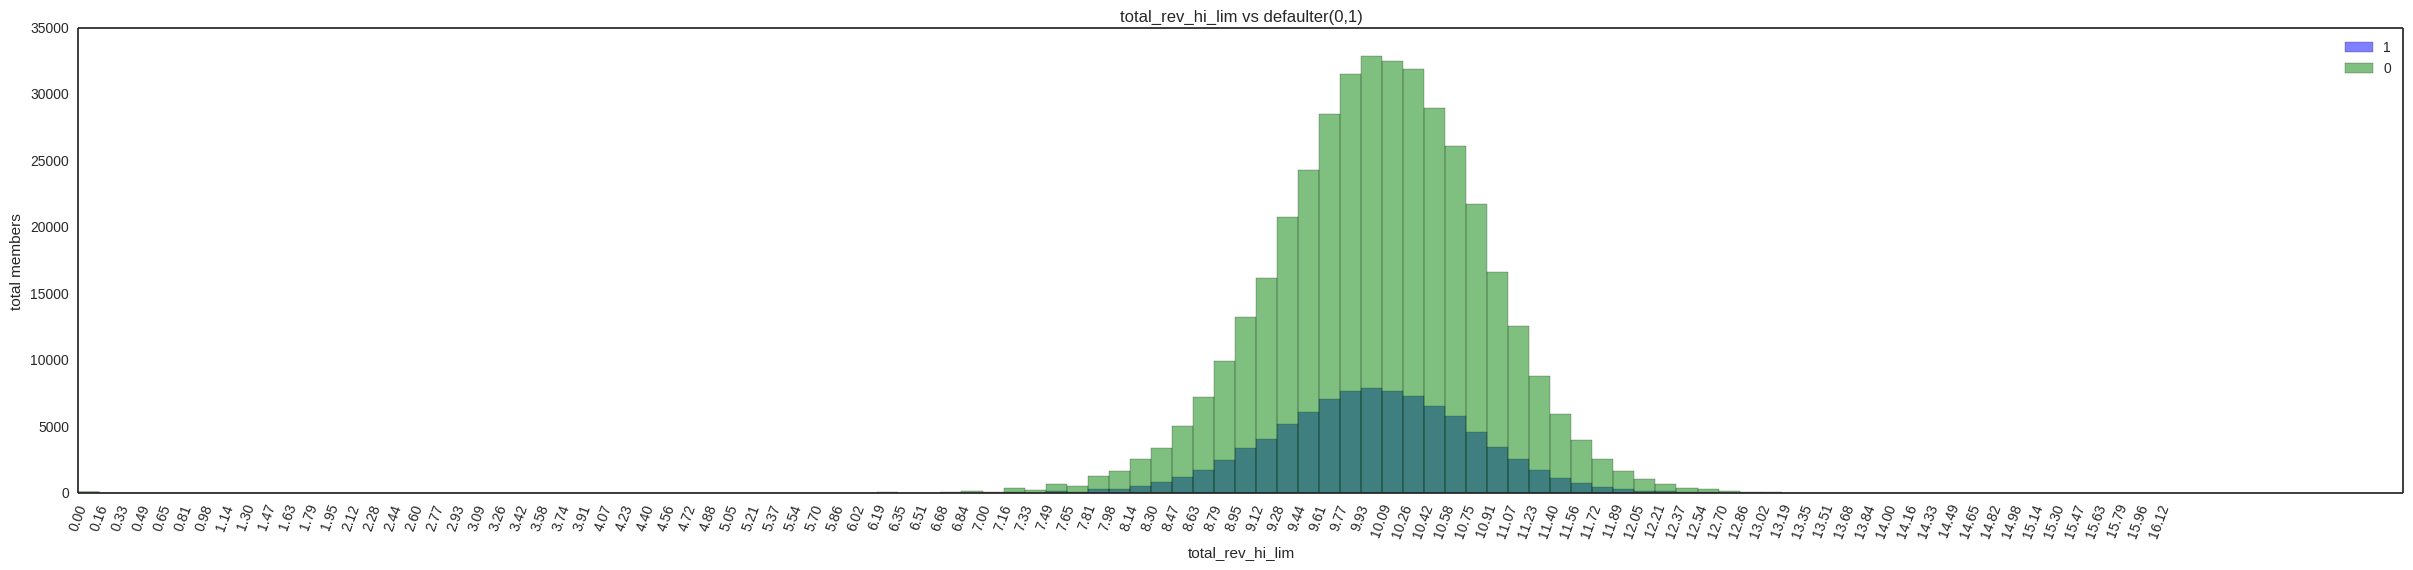

In [945]:
plot_hist(df,'total_rev_hi_lim',100,True)

In [946]:
# plot_boxes(df,'total_rev_hi_lim')

In [947]:
df_duo.drop(['total_rev_hi_lim'],axis=1,inplace=True)

# for column = acc_now_delinq

In [948]:
descp(df,'acc_now_delinq')

count    532412.000000
mean          0.005015
std           0.079117
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: acc_now_delinq, dtype: float64
max 14.0
min 0.0


0.0     529949
1.0       2304
2.0        134
3.0         16
4.0          5
5.0          2
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

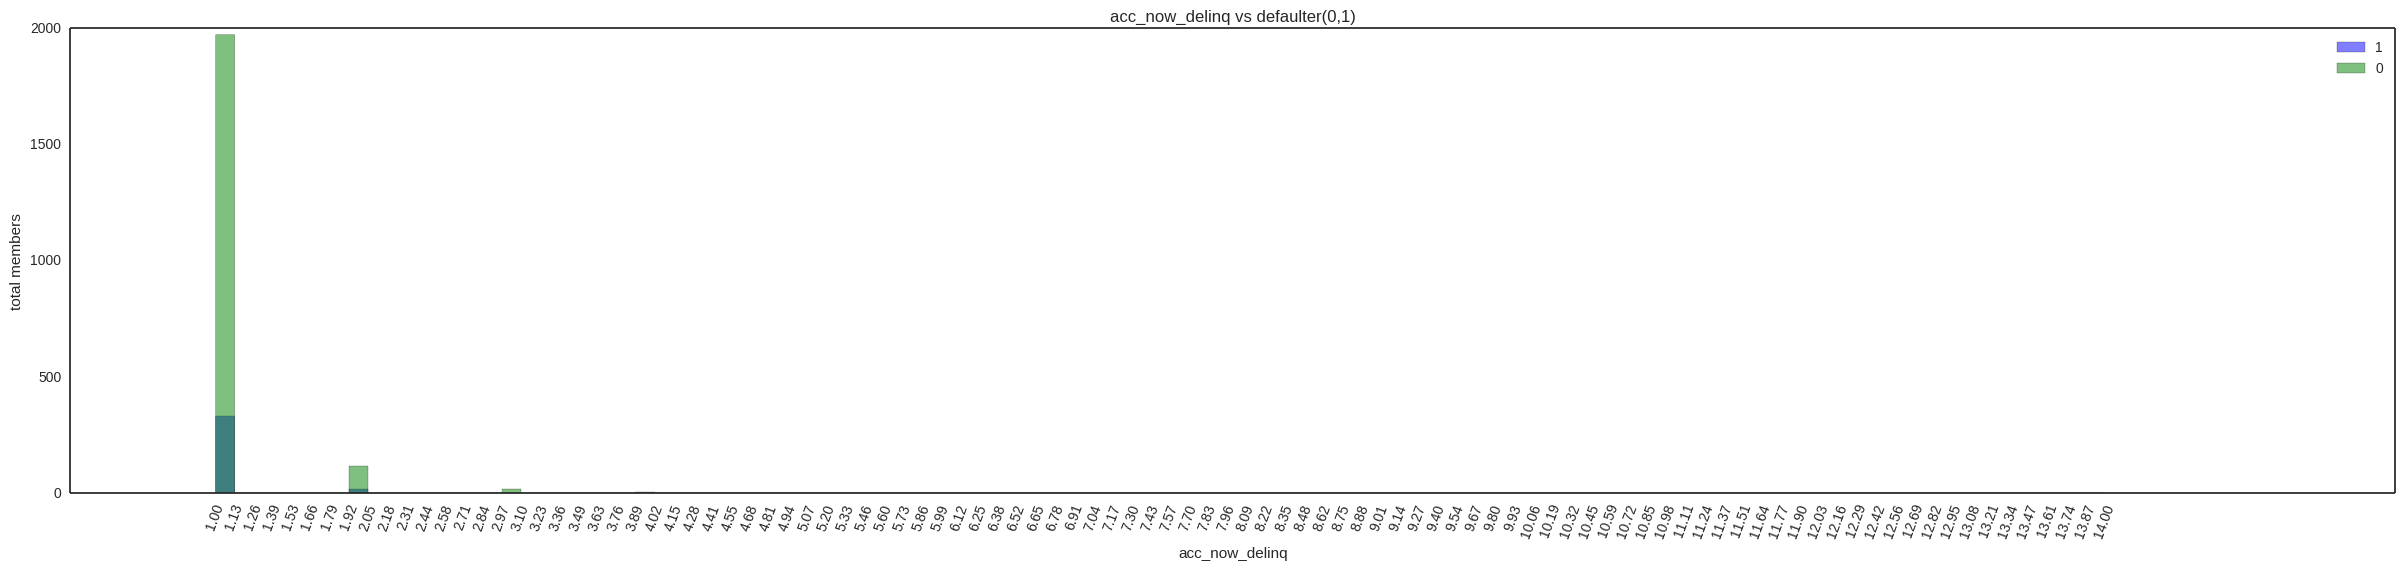

In [949]:
plot_hist(df[df.acc_now_delinq!=0],'acc_now_delinq',100)

In [950]:
# plot_boxes(df,'acc_now_delinq')

In [951]:
def transform_acc_now_delinq(item):
    if item==0:
        return 'high0'
    elif item==1:
        return 'medium1'
    elif item==2:
        return 'medium2'
    else:
        return 'low3_'

df_duo.drop( df_duo[(df_duo.loan_status==0) & (df_duo.acc_now_delinq>7) ].index,inplace=True )

df_duo['acc_delinq'] = df_duo['acc_now_delinq'].map(transform_acc_now_delinq)
df_duo = dummy_it(df_duo,'acc_now_delinq','acc_delinq')

# for column = anuual_inc

In [952]:
descp(df,'annual_inc')

count    5.324250e+05
mean     7.502984e+04
std      6.519985e+04
min      1.200000e+03
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64
max 9500000.0
min 1200.0


60000.00     20558
50000.00     18363
65000.00     15420
70000.00     14493
40000.00     14352
80000.00     13621
45000.00     13589
75000.00     13372
55000.00     12416
90000.00     10305
100000.00    10228
85000.00      9415
35000.00      8982
30000.00      8340
120000.00     7887
52000.00      7407
42000.00      7055
48000.00      6755
110000.00     6592
72000.00      5815
95000.00      5558
150000.00     4837
62000.00      4656
36000.00      4616
38000.00      4310
125000.00     4231
32000.00      4014
58000.00      3974
54000.00      3942
130000.00     3888
             ...  
78006.00         1
205600.00        1
77890.00         1
77887.00         1
77813.00         1
77766.00         1
77771.00         1
77775.00         1
77776.00         1
77777.00         1
63149.68         1
77791.00         1
77795.00         1
77796.00         1
77801.00         1
77803.00         1
77837.00         1
50393.04         1
19460.00         1
311416.00        1
19464.00         1
19465.00    

In [953]:
# plot_hist(df,'annual_inc',20,True)

In [954]:
# plot_boxes(df,'annual_inc')

In [955]:
#df_duo = log_it(df_duo,'annual_inc')

# for column = collections_12_mths_ex_med

In [956]:
descp(df,'collections_12_mths_ex_med')

count    532333.000000
mean          0.014299
std           0.133005
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: collections_12_mths_ex_med, dtype: float64
max 16.0
min 0.0


0.0     525346
1.0       6494
2.0        416
3.0         53
4.0         15
5.0          6
7.0          1
16.0         1
14.0         1
Name: collections_12_mths_ex_med, dtype: int64

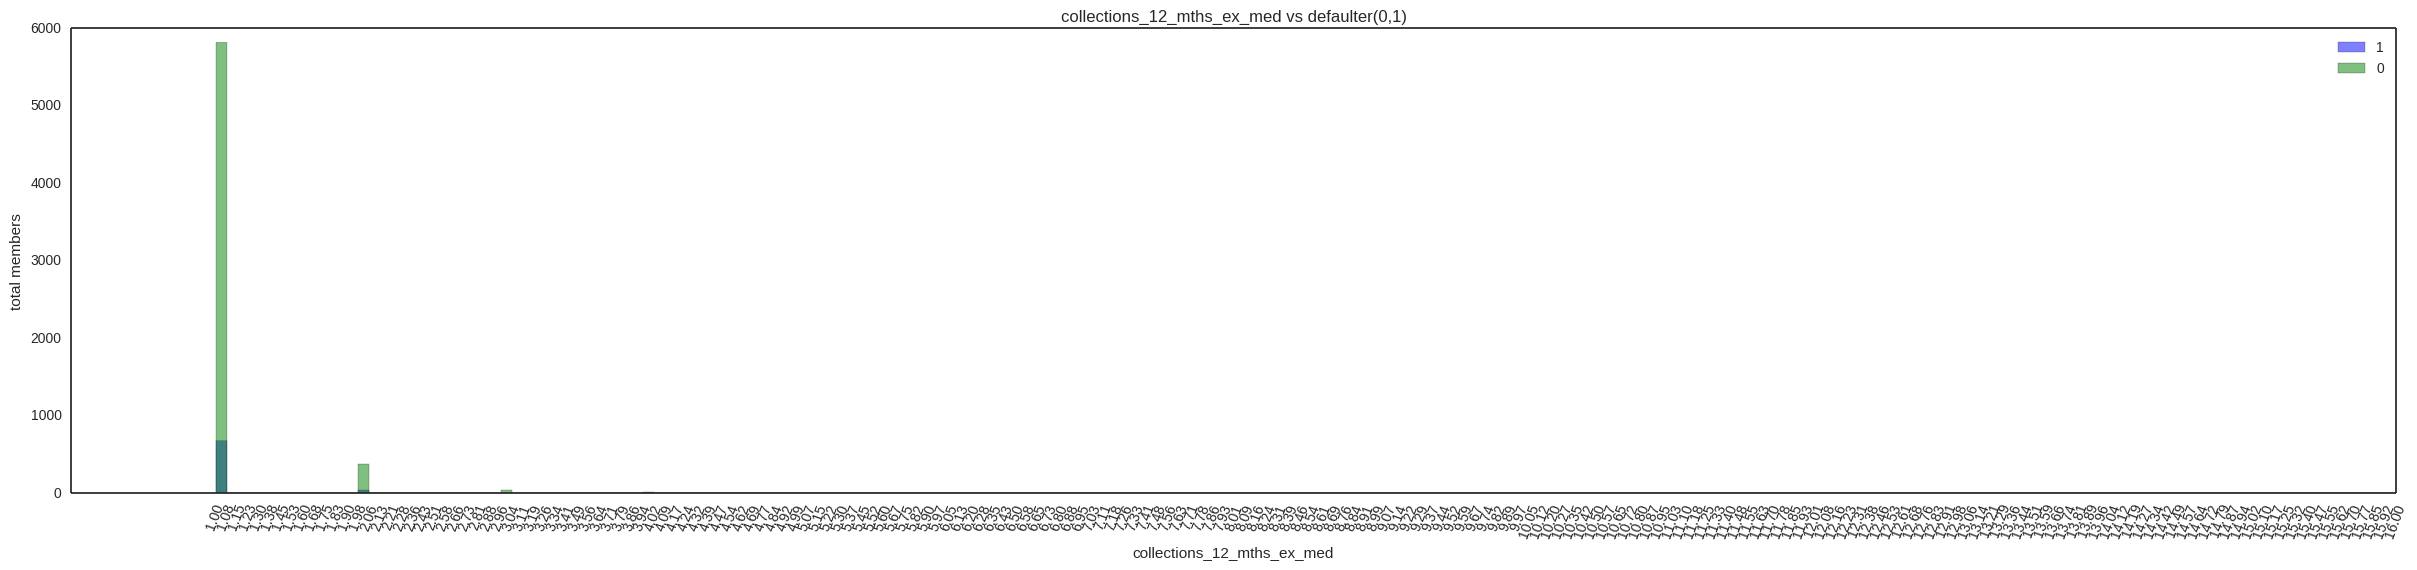

In [957]:
plot_hist(df[df.collections_12_mths_ex_med!=0],'collections_12_mths_ex_med',200)

In [958]:
def transform_it(item):
    if item == 0:
        return 'high0'

    elif item==1:
        return 'high1'

    elif item==2:
        return 'low2'

    elif item == 3:
        return 'low3'

    else:
        return 'lowest'

df_duo['med_collections'] = df_duo['collections_12_mths_ex_med'].map(transform_it)
df_duo = dummy_it(df_duo,'collections_12_mths_ex_med','med_collections')

# for column = dti

In [959]:
descp(df,'dti')

count    532428.000000
mean         18.138767
std           8.369074
min           0.000000
25%          11.930000
50%          17.650000
75%          23.950000
max         672.520000
Name: dti, dtype: float64
max 672.52
min 0.0


14.40     410
19.20     399
18.00     390
16.80     385
15.60     380
13.20     374
12.00     355
20.40     353
21.60     348
22.80     324
17.04     322
24.00     312
10.80     311
13.92     309
13.44     304
18.72     303
18.48     303
17.76     299
9.60      297
20.88     297
15.84     296
15.12     296
16.20     295
12.48     294
17.28     294
19.68     293
13.68     293
14.16     291
19.44     291
14.88     290
         ... 
42.17       1
44.89       1
64.50       1
47.31       1
40.61       1
45.32       1
42.04       1
42.64       1
44.86       1
57.14       1
41.46       1
54.36       1
46.67       1
48.48       1
68.30       1
44.22       1
46.92       1
120.66      1
61.21       1
83.40       1
380.53      1
47.61       1
69.35       1
41.49       1
71.40       1
104.00      1
54.43       1
55.06       1
44.43       1
137.40      1
Name: dti, dtype: int64

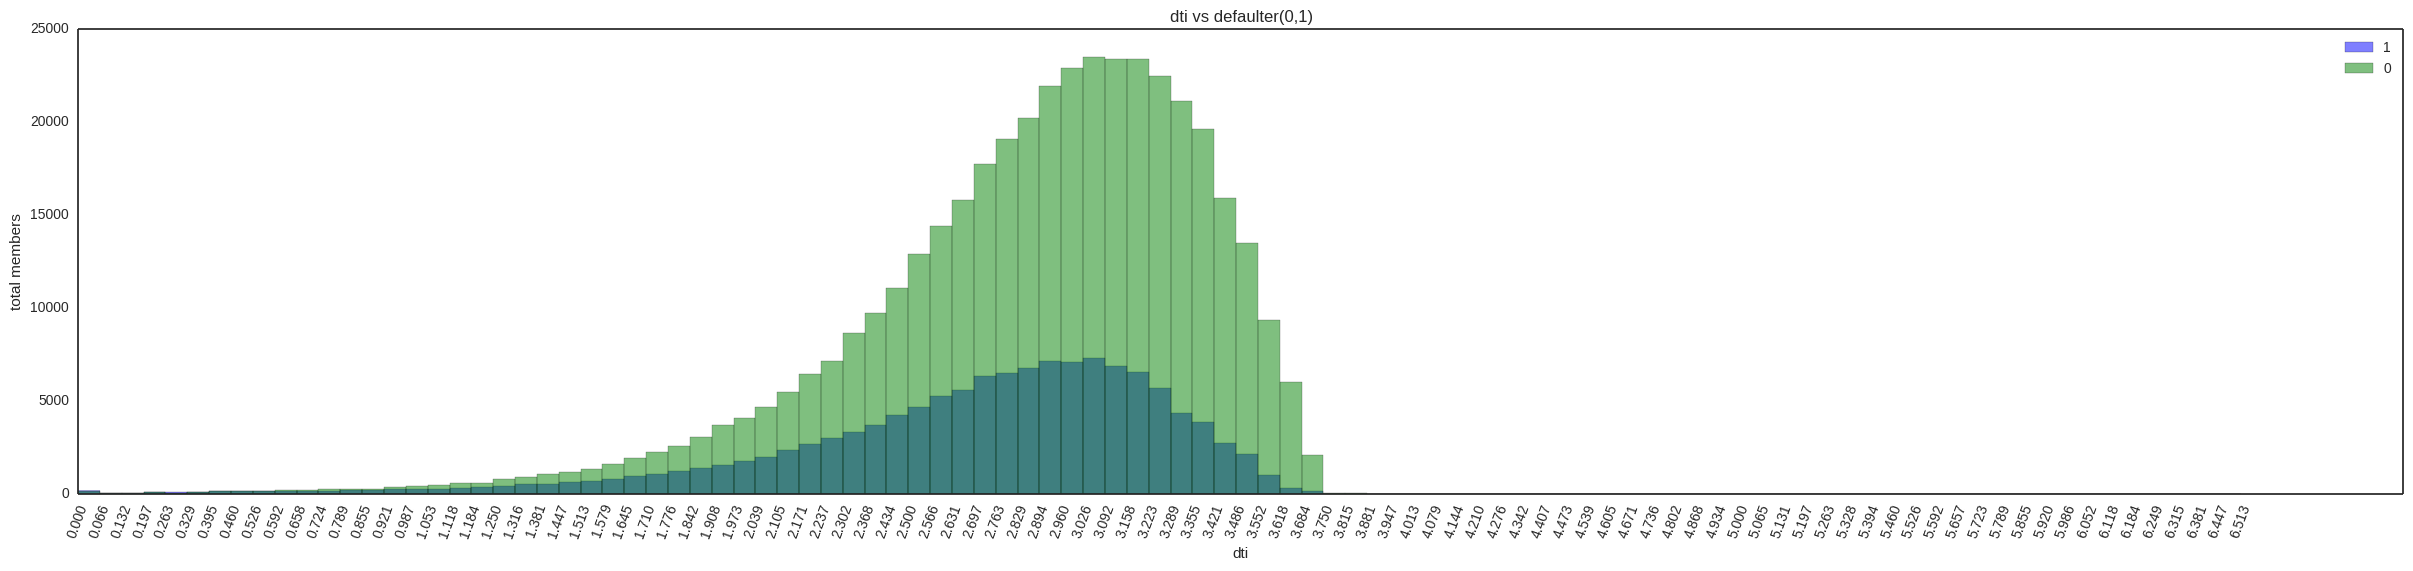

In [960]:
plot_hist(df,'dti',100,True)

In [961]:
# plot_boxes(df,'dti')

406595 125826


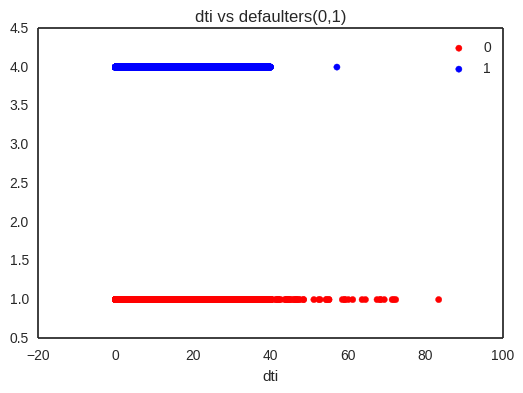

array([  33.88,    3.64,   18.42, ...,   48.91,   42.1 ,  100.09])

In [962]:
def transform_dti(item):

    if item<=0.1:
        return 'high_0.1'

    elif item>0.1 and item<=1.25:
        return 'high_1.25'

    elif item>1.25 and item<=2.3:
        return 'low_2.3'

    elif item>2.3 and item<=3.55:
        return 'low_3.55'
    
    elif item>3.55 and item<=3.75:
        return 'low_3.75'

    elif item>3.75:
        return 'remaining'

df_duo.drop( df_duo[(df_duo.dti>100) & (df_duo.loan_status==0) ].index,inplace=True )
plot_scatter_box(df_duo,'dti')
df_duo['dti'].map(transform_dti)
df_duo['dti'].unique()

# for column = inq_last_6mnths

In [963]:
descp(df,'inq_last_6mths')

count    532412.000000
mean          0.694603
std           0.997025
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          31.000000
Name: inq_last_6mths, dtype: float64
max 31.0
min 0.0


0.0     298854
1.0     144735
2.0      56369
3.0      22548
4.0       6533
5.0       2397
6.0        720
7.0         99
8.0         79
9.0         26
10.0        15
11.0         9
12.0         8
15.0         6
14.0         3
18.0         2
16.0         2
24.0         2
13.0         1
31.0         1
17.0         1
28.0         1
20.0         1
Name: inq_last_6mths, dtype: int64

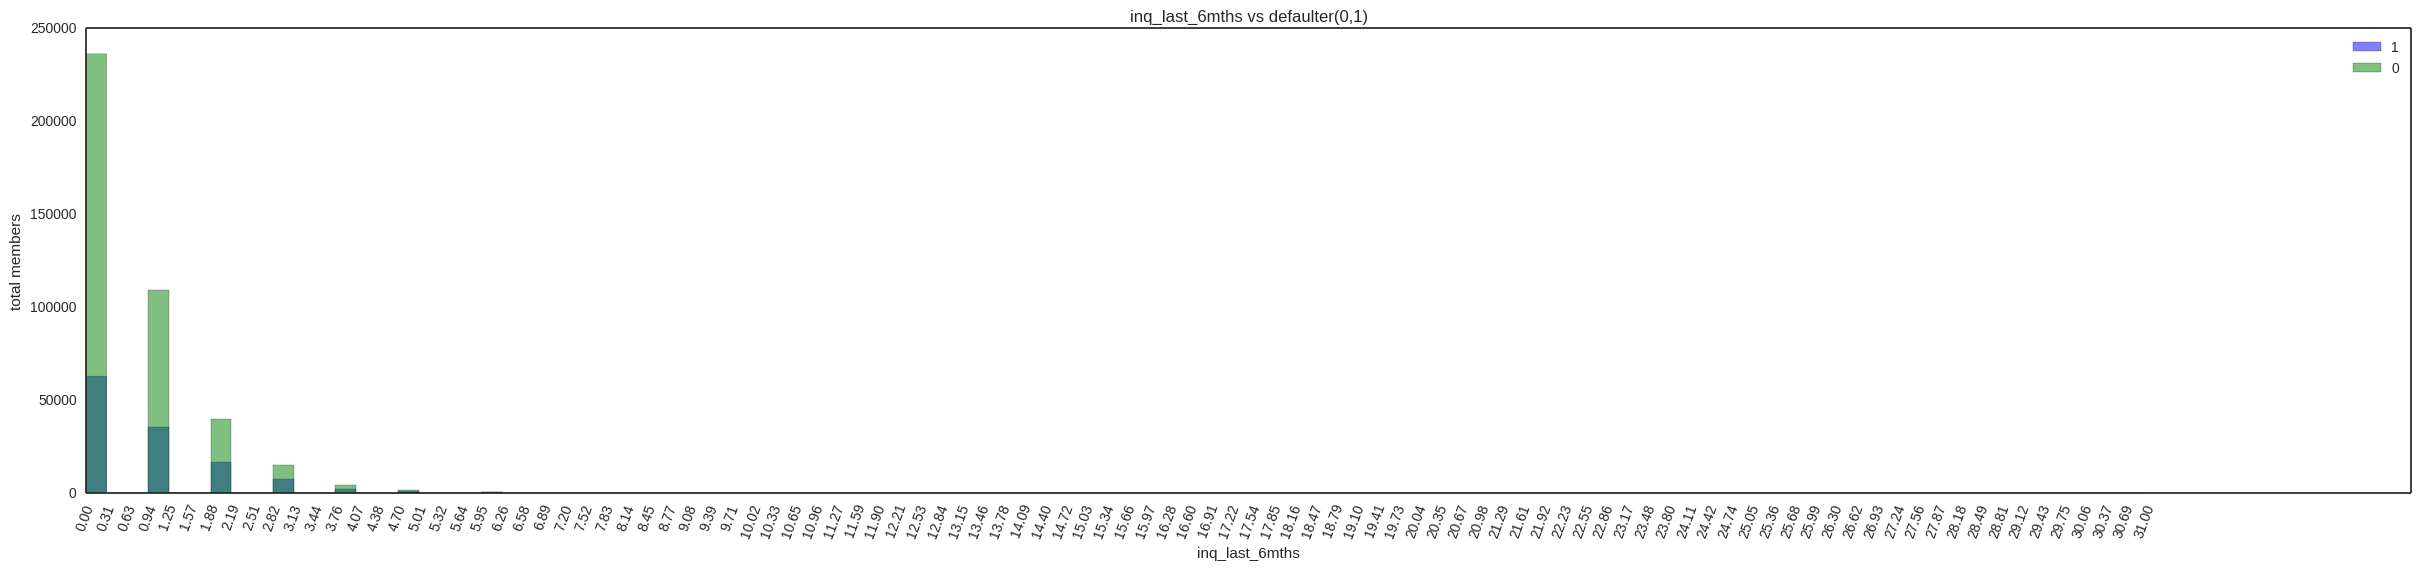

In [964]:
plot_hist(df,'inq_last_6mths',100)

In [965]:
# plot_boxes(df,'inq_last_6mths')

In [966]:
def transform_inq_last_6mths(item):
    if item==0:
        return '0'
    elif item>0 and item<=2:
        return '1_2'
    elif item>2 and item<=15:
        return '3_15'
    else:
        return '15_'
df_duo['inq_6mths'] = df['inq_last_6mths'].map(transform_inq_last_6mths)
df_duo = dummy_it(df_duo,'inq_last_6mths','inq_6mths')

# for column = int_rate

In [967]:
descp(df,'int_rate')

count    532428.000000
mean         13.242969
std           4.379611
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64
max 28.99
min 5.32


10.99    20609
9.17     15436
15.61    15207
9.99     13054
7.89     12219
13.99    11332
12.69    11317
12.29    11233
12.99    11083
17.57    10754
8.18     10614
13.33    10516
16.99     9747
11.53     9700
11.99     9371
14.65     8963
18.25     6895
8.90      6866
16.55     6638
6.03      6412
16.29     6391
17.86     6330
14.99     6129
7.90      6062
13.98     5877
12.49     5871
5.32      5751
7.26      5744
12.12     5658
14.33     5346
         ...  
18.53        3
15.38        3
27.99        2
14.67        2
16.91        2
22.94        2
17.09        2
18.36        2
17.59        2
21.21        2
13.84        2
12.62        2
20.40        2
21.82        2
20.52        2
19.16        2
18.86        2
23.59        2
16.46        1
17.44        1
24.59        1
14.28        1
19.82        1
17.28        1
19.39        1
17.46        1
14.57        1
20.69        1
16.33        1
17.91        1
Name: int_rate, dtype: int64

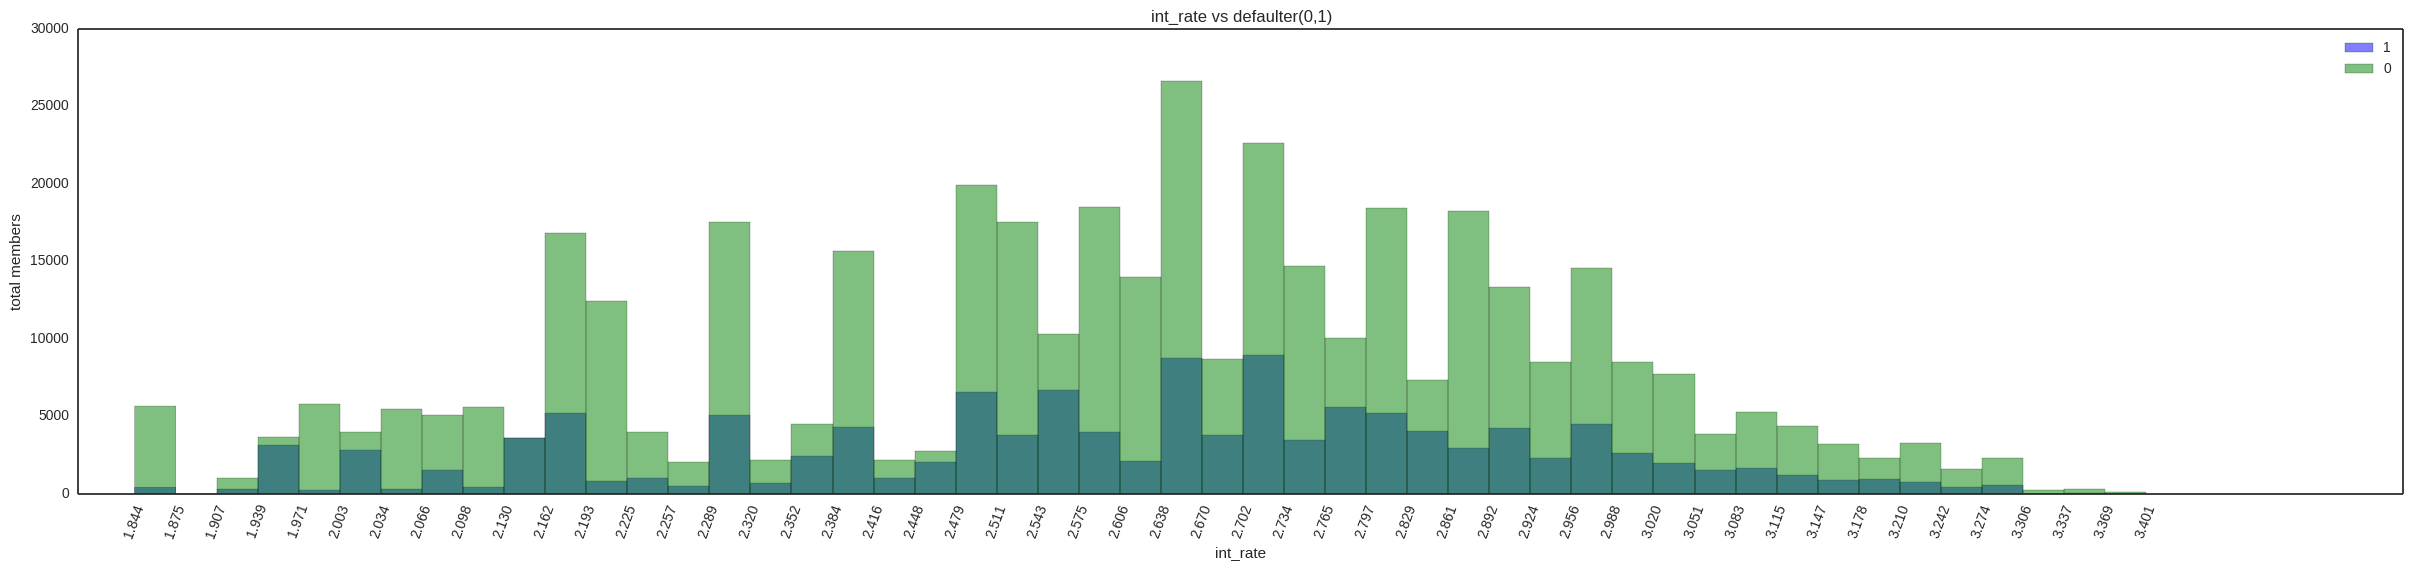

In [968]:
plot_hist(df,'int_rate',50,True)

In [969]:
# plot_boxes(df,'int_rate')

In [970]:
df_duo = log_it(df_duo,'int_rate')

# for column = member_id

In [971]:
descp(df,'member_id')

count    5.324280e+05
mean     3.500547e+07
std      2.412148e+07
min      7.047300e+04
25%      1.086688e+07
50%      3.709590e+07
75%      5.848920e+07
max      7.354484e+07
Name: member_id, dtype: float64
max 73544841
min 70473


26216447    1
5308085     1
69615213    1
32908910    1
822758      1
53935733    1
57075318    1
46962149    1
71259567    1
9256974     1
11617922    1
55396367    1
13698698    1
49352331    1
12658318    1
42063504    1
4316817     1
30004398    1
7638839     1
48832367    1
60917402    1
35753627    1
66461887    1
14788254    1
51400355    1
1078948     1
66066088    1
67828256    1
64825066    1
1062572     1
           ..
30223600    1
8133846     1
16520407    1
9112773     1
32267486    1
7191778     1
68007139    1
48692022    1
14517477    1
1872993     1
31127369    1
14979390    1
5826924     1
52305413    1
32318705    1
10667277    1
8207602     1
8199414     1
45460845    1
14511352    1
50167034    1
49292084    1
53302527    1
66235648    1
11707649    1
70434050    1
72529155    1
11699461    1
45260038    1
58720256    1
Name: member_id, dtype: int64

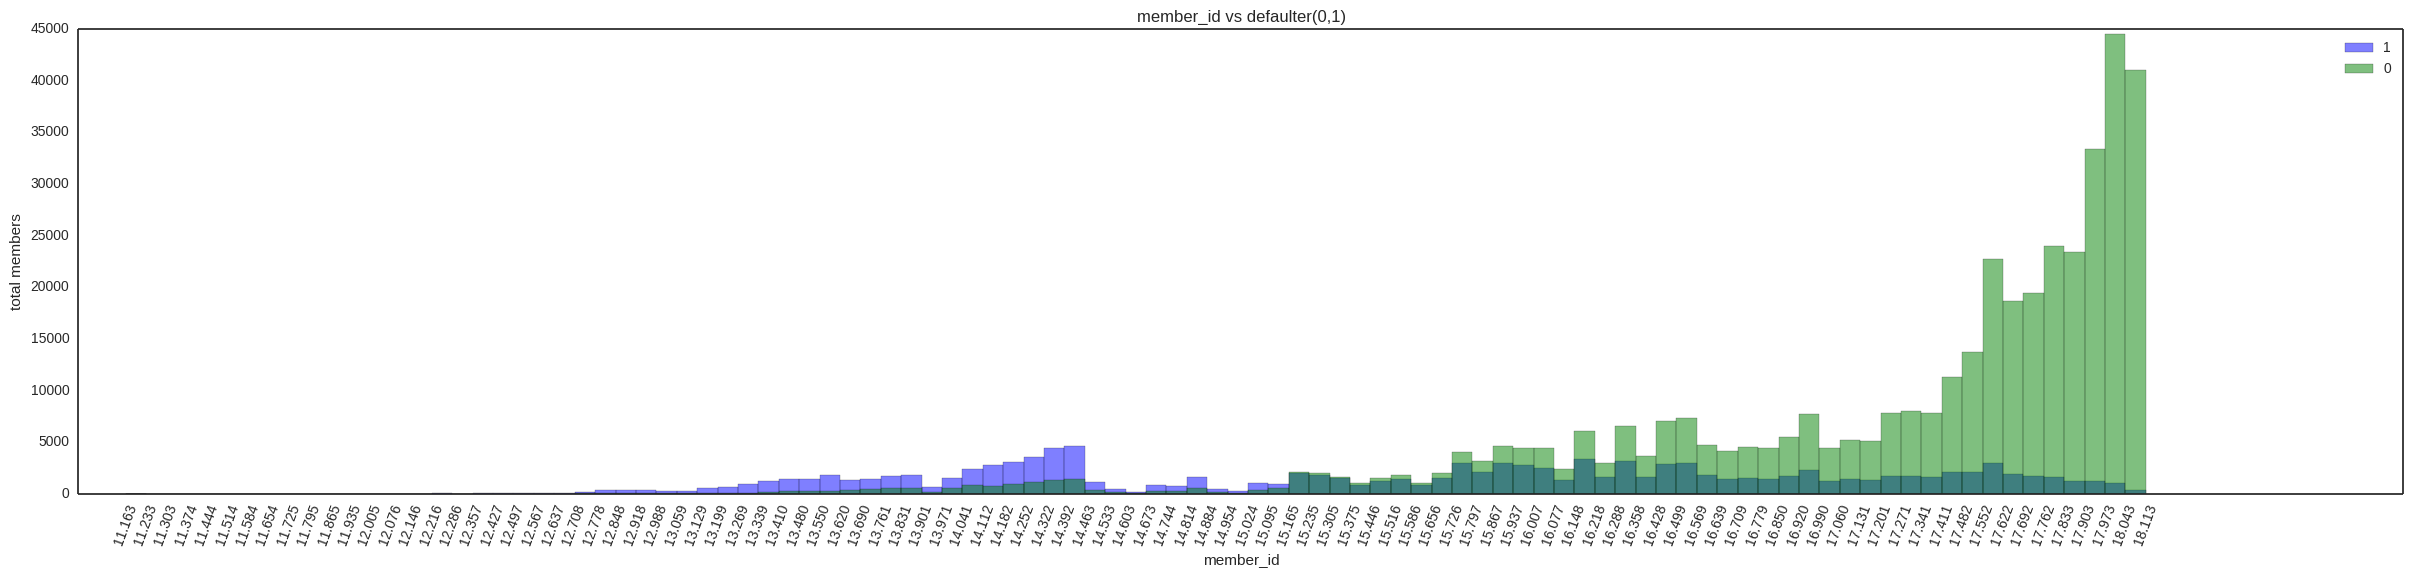

In [972]:
plot_hist(df,'member_id',100,True)

In [973]:
# plot_boxes(df,'member_id')

In [974]:
print np.linspace(70473,73544841,100).astype(int)

[   70473   812638  1554803  2296969  3039134  3781299  4523465  5265630
  6007795  6749961  7492126  8234291  8976457  9718622 10460787 11202953
 11945118 12687283 13429449 14171614 14913779 15655945 16398110 17140275
 17882441 18624606 19366771 20108937 20851102 21593267 22335433 23077598
 23819763 24561929 25304094 26046259 26788425 27530590 28272755 29014921
 29757086 30499251 31241417 31983582 32725747 33467913 34210078 34952243
 35694409 36436574 37178739 37920905 38663070 39405235 40147401 40889566
 41631731 42373897 43116062 43858227 44600393 45342558 46084723 46826889
 47569054 48311219 49053385 49795550 50537715 51279881 52022046 52764211
 53506377 54248542 54990707 55732873 56475038 57217203 57959369 58701534
 59443699 60185865 60928030 61670195 62412361 63154526 63896691 64638857
 65381022 66123187 66865353 67607518 68349683 69091849 69834014 70576179
 71318345 72060510 72802675 73544841]


In [975]:
def transform_member_id(item):
    if item<= 3781299:
        return 'high'
    elif item> 3781299 and item<= 7492126:
        return 'medium'
    elif item>7492126 and item<= 15655945:
        return 'low1'
    elif item>15655945 and item<=40889566:
        return 'low2'
    elif item>40889566 and item<= 60185865:
        return 'low3'
    else :
        return 'lowest'
df_duo['mem_id'] = df_duo['member_id'].map(transform_member_id)
df_duo = dummy_it(df_duo,'member_id','mem_id')

# for column = mths_since_last_record

In [976]:
descp(df,'mths_since_last_record')

count    82123.000000
mean        70.093068
std         28.139219
min          0.000000
25%         51.000000
50%         70.000000
75%         92.000000
max        121.000000
Name: mths_since_last_record, dtype: float64
max 121.0
min 0.0


61.0     1180
68.0     1166
62.0     1157
69.0     1156
67.0     1156
65.0     1156
71.0     1151
64.0     1133
63.0     1123
70.0     1115
73.0     1105
75.0     1103
72.0     1101
66.0     1092
76.0     1090
60.0     1087
57.0     1068
59.0     1063
79.0     1056
56.0     1056
77.0     1054
54.0     1044
58.0     1038
55.0     1025
74.0     1018
78.0     1016
53.0     1011
80.0     1010
81.0      989
52.0      985
         ... 
27.0      368
28.0      361
25.0      347
26.0      326
23.0      278
24.0      277
22.0      274
20.0      248
21.0      247
18.0      244
19.0      240
16.0      223
15.0      211
17.0      200
14.0      197
12.0      194
11.0      185
13.0      175
10.0      160
9.0       156
8.0       145
7.0       132
6.0       118
5.0       101
4.0        95
3.0        71
1.0        45
2.0        36
120.0       8
121.0       2
Name: mths_since_last_record, dtype: int64

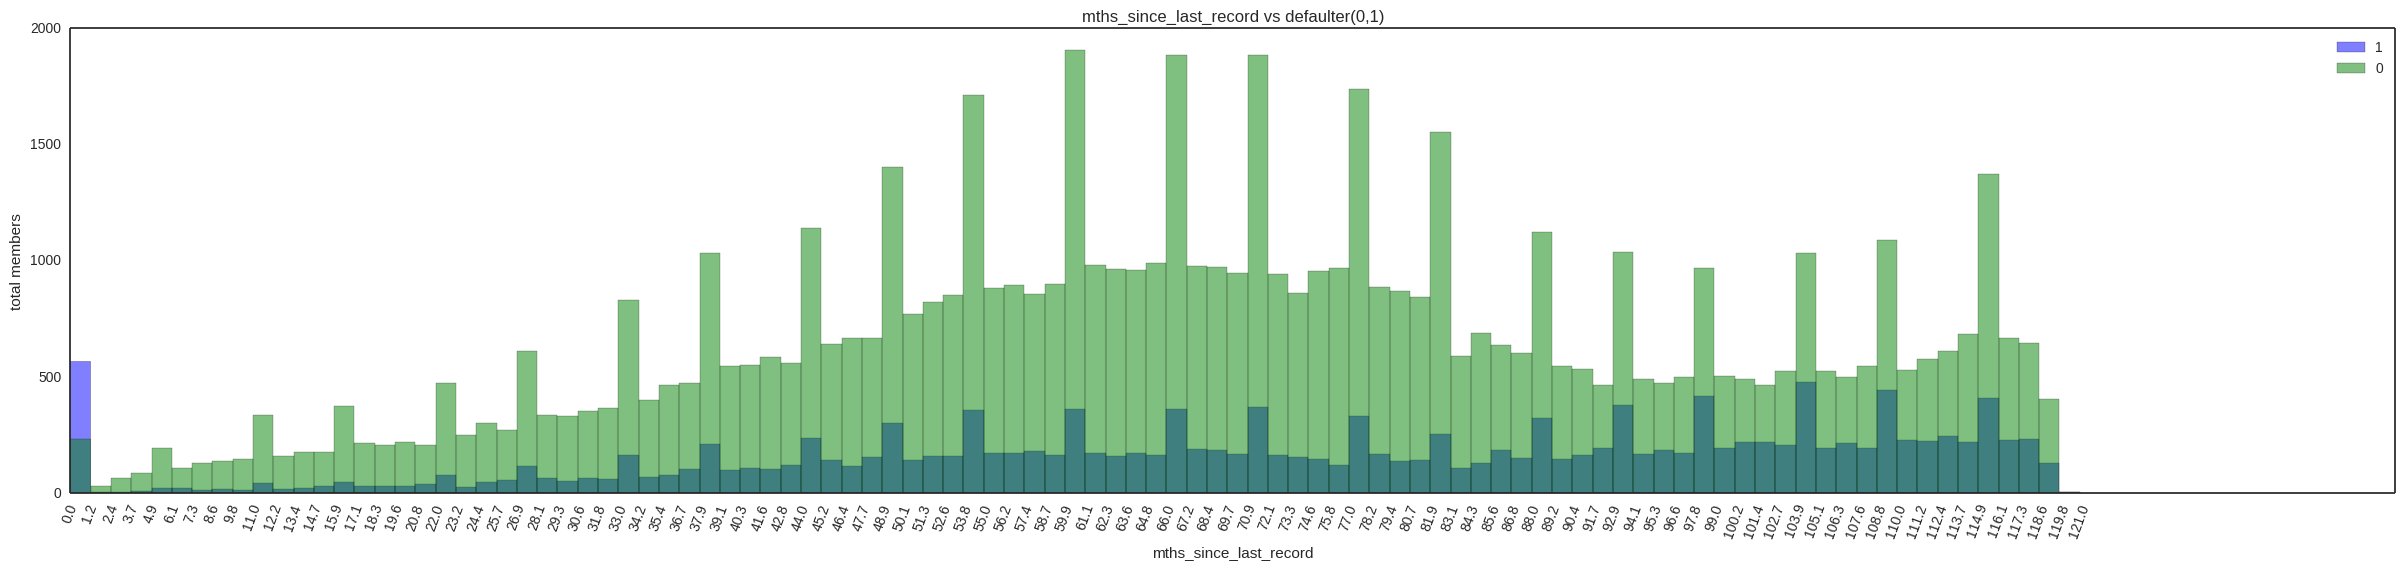

In [977]:
plot_hist(df,'mths_since_last_record',100)

In [978]:
# plot_boxes(df,'mths_since_last_record')

In [979]:
def transform_mths_since_last_record(item):
    if item<=1.2:
        return 'high'
    elif item>1.2 and item<=4.9:
        return 'medium'
    elif item>4.9 and item<=83.1:
        return 'low'
    else:
        return 'lowest'
df_duo['mths_last_record'] = df_duo['mths_since_last_record'].map(transform_mths_since_last_record)
df_duo = dummy_it(df_duo,'mths_since_last_record','mths_last_record')

# for column = pub_rec

In [980]:
descp(df,'pub_rec')

count    532412.000000
mean          0.194858
std           0.583822
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64
max 86.0
min 0.0


0.0     451040
1.0      67938
2.0       8841
3.0       2692
4.0        974
5.0        424
6.0        238
7.0         97
8.0         67
9.0         23
10.0        23
11.0        16
12.0        12
13.0         7
21.0         4
16.0         3
15.0         2
20.0         1
40.0         1
14.0         1
86.0         1
49.0         1
63.0         1
22.0         1
17.0         1
28.0         1
18.0         1
23.0         1
Name: pub_rec, dtype: int64

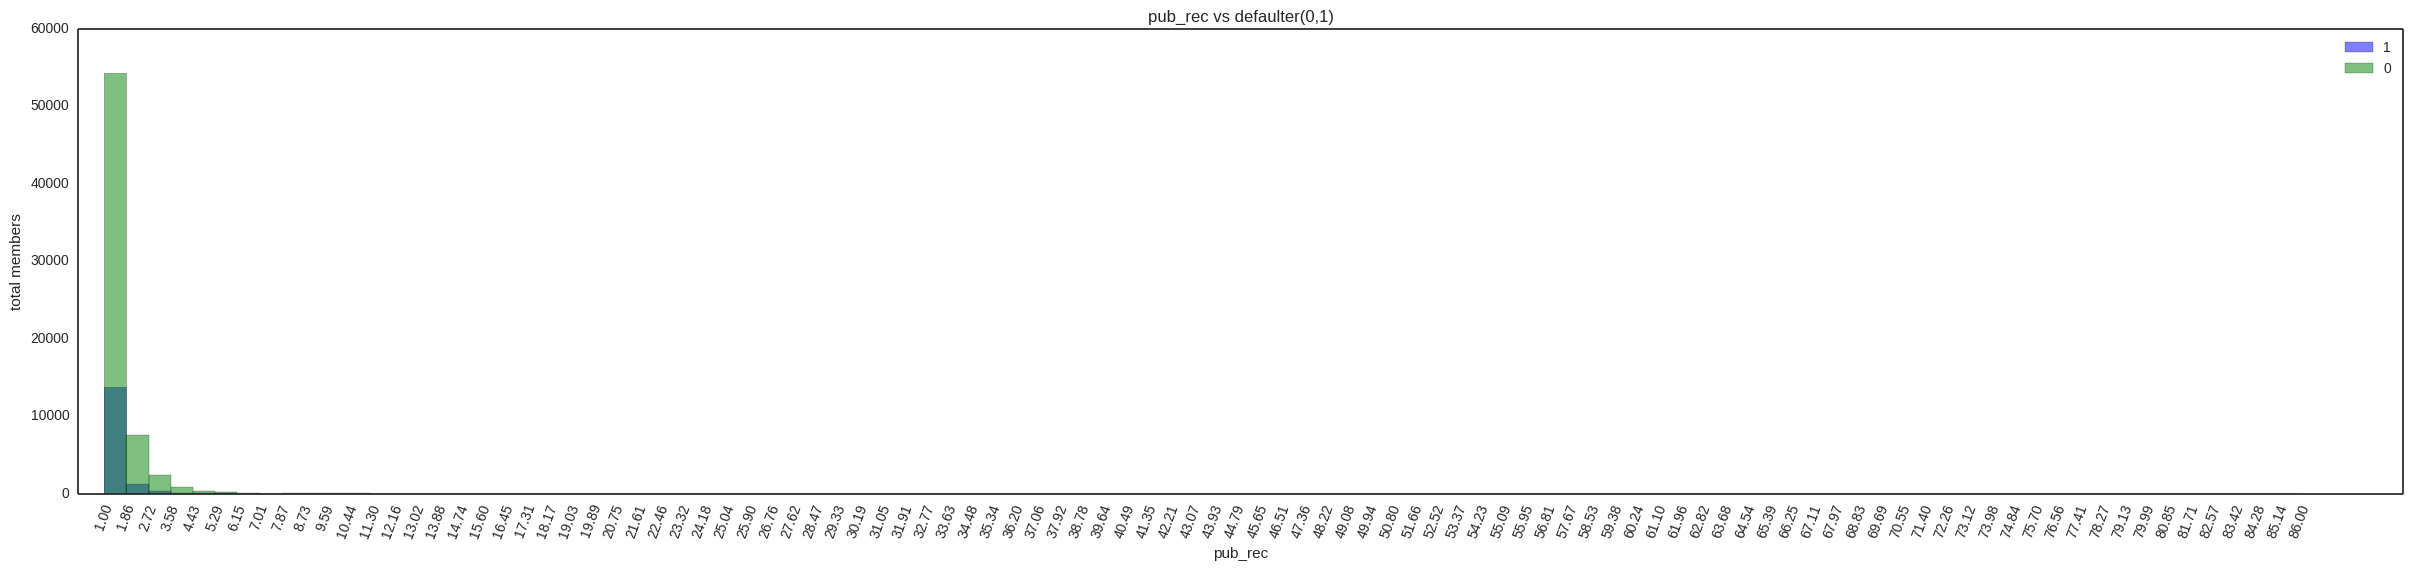

In [981]:
plot_hist(df[df.pub_rec!=0],'pub_rec',100)

In [982]:
# plot_boxes(df,'pub_rec')

In [983]:
def transform_pub_rec(item):
    if item==0:
        return '0'
    elif item==1:
        return '1'
    elif item ==2:
        return '3'
    elif item==3:
        return '3'
    else:
        return '4_'

print df_duo[df_duo.pub_rec>20].index
df_duo.drop(df_duo[ (df_duo.pub_rec>20) & (df_duo.pub_rec==0) ].index,inplace=True)
df_duo['rec'] = df_duo['pub_rec'].map(transform_pub_rec)
df_duo = dummy_it(df_duo,'pub_rec','rec')

Int64Index([ 40406,  61832, 157064, 175379, 208067, 265509, 307687, 414478,
            442540, 464635, 464745, 677825, 805639, 832463, 881121],
           dtype='int64')


# for column = revol_util

In [984]:
descp(df,'revol_util')

count    532141.000000
mean         55.057189
std          23.853436
min           0.000000
25%          37.700000
50%          56.000000
75%          73.600000
max         892.300000
Name: revol_util, dtype: float64
max 892.3
min 0.0


0.00      2137
53.00     1124
58.00     1082
52.00     1054
62.00     1047
48.00     1045
55.00     1040
54.00     1023
61.00     1021
59.00     1018
60.00     1017
57.00     1008
63.00     1004
66.00     1004
46.00      996
50.00      981
47.00      970
65.00      966
67.00      965
64.00      962
56.00      960
70.00      955
68.00      955
51.00      954
71.00      938
75.00      931
44.00      930
69.00      926
49.00      925
72.00      923
          ... 
21.72        1
115.60       1
58.19        1
107.60       1
5.33         1
9.71         1
121.10       1
141.10       1
130.10       1
126.10       1
122.80       1
134.30       1
111.50       1
7.28         1
18.82        1
133.10       1
7.43         1
119.60       1
116.80       1
11.63        1
56.26        1
126.30       1
134.10       1
130.20       1
131.80       1
5.79         1
128.10       1
127.40       1
141.80       1
17.78        1
Name: revol_util, dtype: int64

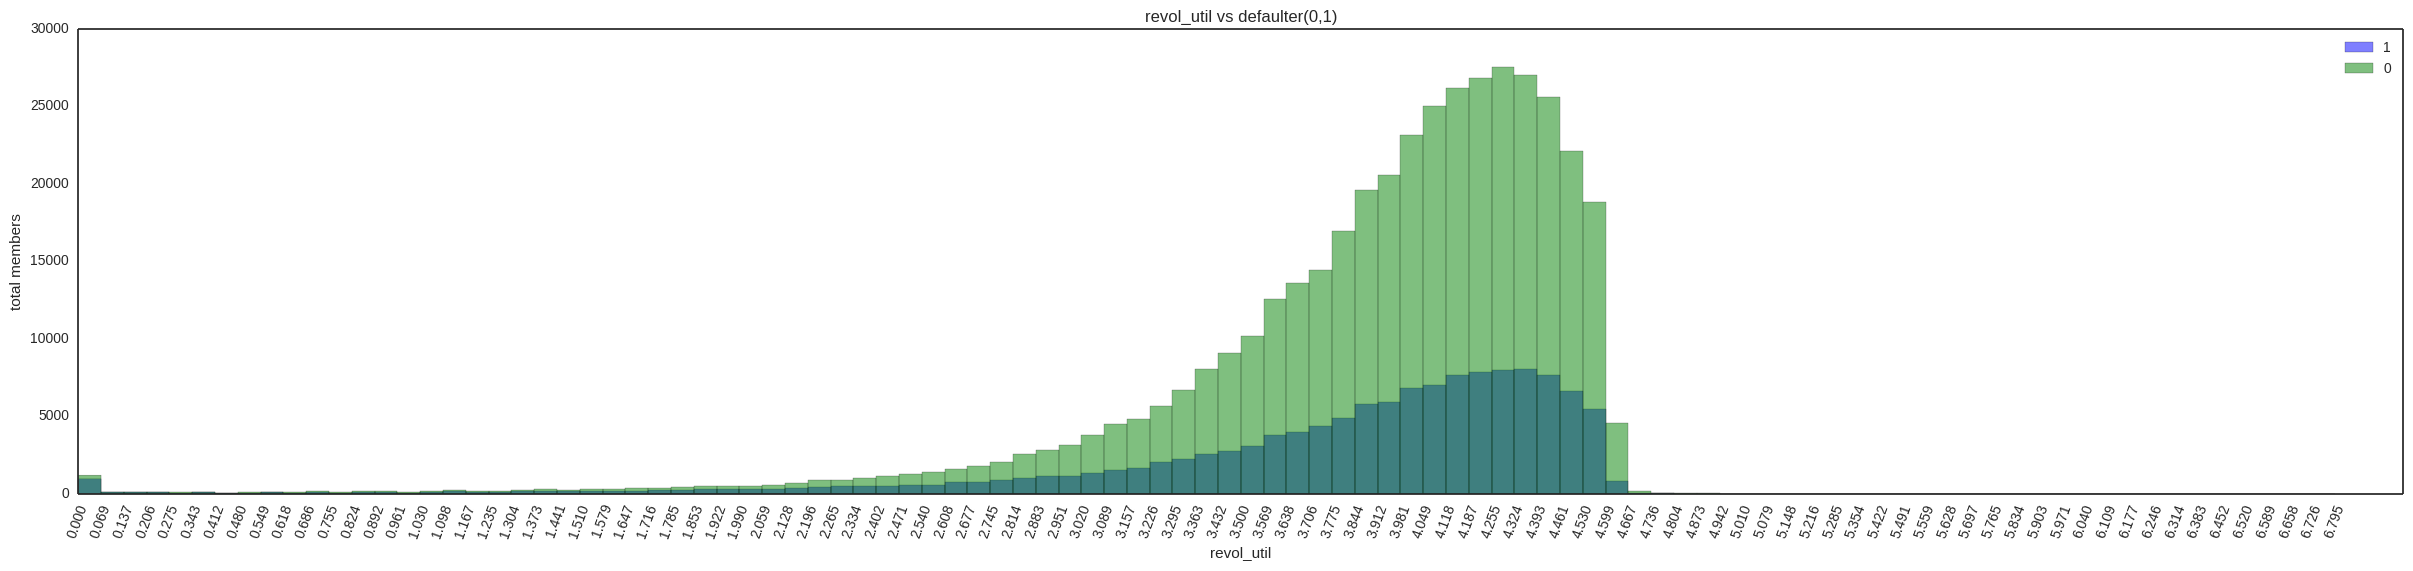

In [985]:
plot_hist(df,'revol_util',100,True)

In [986]:
# plot_boxes(df,'revol_util')

In [987]:
df_duo.drop(['revol_util'],axis=1,inplace=True)

# for column = tot_coll_amt

In [988]:
descp(df,'tot_coll_amt')

count    490424.000000
mean        213.562222
std        1958.571538
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      496651.000000
Name: tot_coll_amt, dtype: float64
max 496651.0
min 0.0


0.0        420903
50.0         1053
100.0         815
75.0          631
150.0         418
200.0         409
60.0          392
80.0          374
70.0          349
55.0          327
65.0          309
90.0          298
85.0          274
250.0         273
54.0          242
66.0          235
125.0         231
79.0          226
58.0          226
95.0          226
67.0          225
71.0          222
99.0          217
81.0          215
78.0          215
53.0          214
63.0          213
72.0          211
86.0          210
56.0          208
            ...  
3724.0          1
3397.0          1
13587.0         1
5510.0          1
4756.0          1
13577.0         1
3394.0          1
5120.0          1
5511.0          1
13567.0         1
13566.0         1
3391.0          1
22047.0         1
5512.0          1
13554.0         1
5531.0          1
5517.0          1
13549.0         1
22069.0         1
88303.0         1
22077.0         1
5522.0          1
13537.0         1
22098.0         1
3384.0    

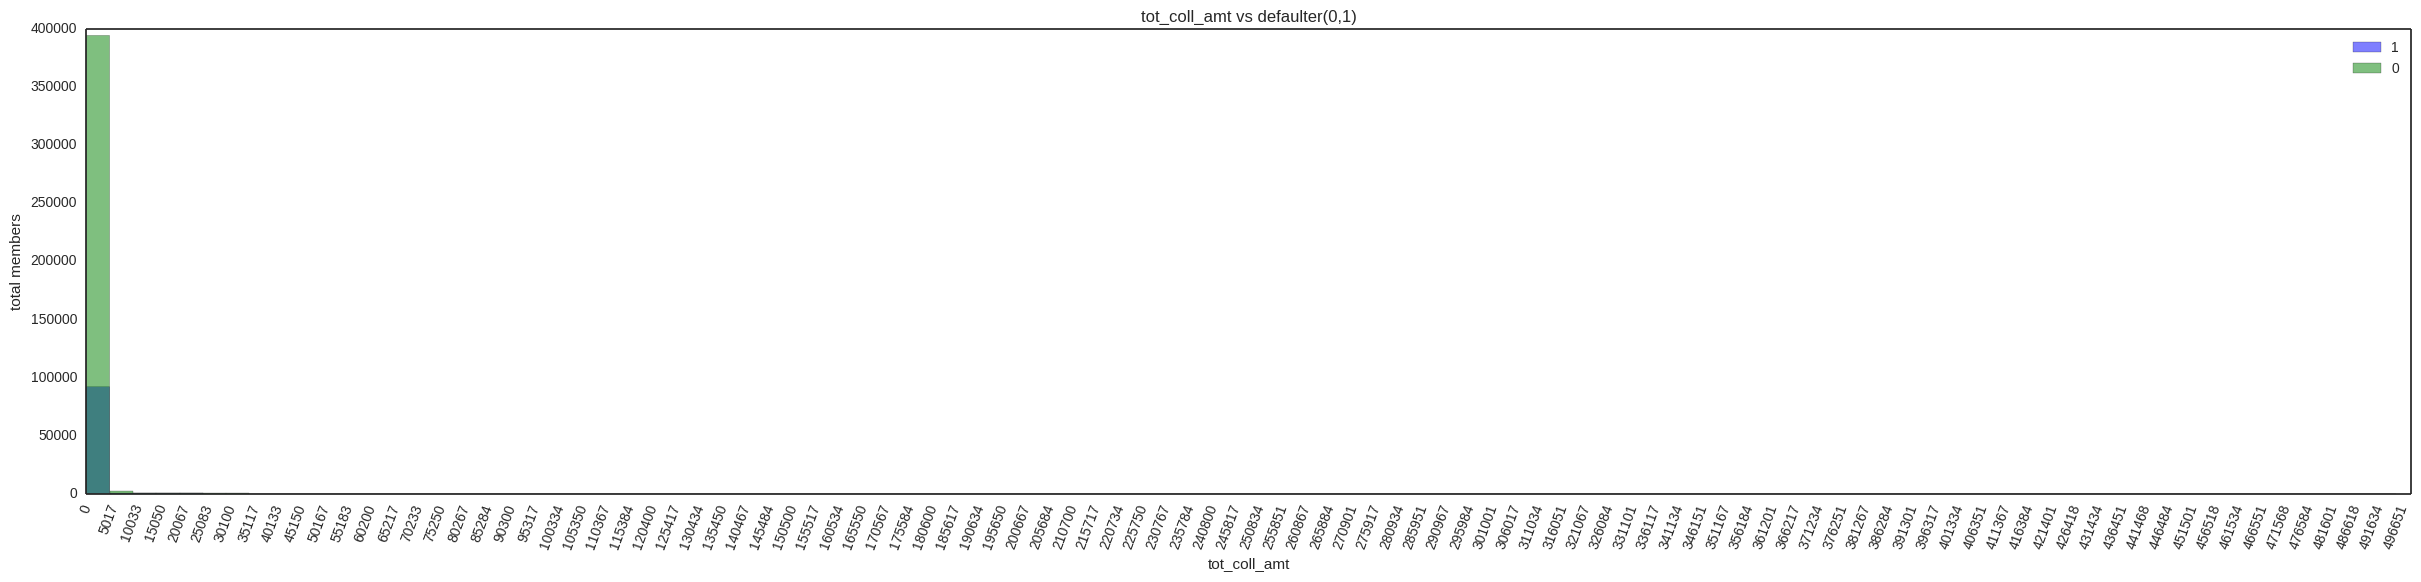

In [989]:
plot_hist(df,'tot_coll_amt',100)

In [990]:
df_duo.drop(['tot_coll_amt'],axis=1,inplace=True)

# for column = tot_cur_bal

In [991]:
descp(df,'tot_cur_bal')

count    4.904240e+05
mean     1.395541e+05
std      1.539149e+05
min      0.000000e+00
25%      2.983975e+04
50%      8.066950e+04
75%      2.084792e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64
max 8000078.0
min 0.0


0.0         78
14511.0     17
19998.0     15
27316.0     15
5537.0      15
23254.0     14
14535.0     14
29232.0     14
22611.0     14
23346.0     14
18876.0     14
8028.0      13
10652.0     13
28674.0     13
22142.0     13
23963.0     13
23872.0     13
14186.0     13
24008.0     13
17154.0     13
9409.0      13
6679.0      13
32871.0     13
31540.0     13
24989.0     13
18274.0     13
26543.0     13
4578.0      13
20591.0     13
33736.0     13
            ..
297973.0     1
297972.0     1
297967.0     1
74491.0      1
297963.0     1
297961.0     1
297959.0     1
298022.0     1
298030.0     1
298031.0     1
176244.0     1
298065.0     1
18629.0      1
298063.0     1
74515.0      1
298058.0     1
176132.0     1
298056.0     1
204860.0     1
74513.0      1
2475.0       1
298051.0     1
298050.0     1
298047.0     1
298045.0     1
74511.0      1
298043.0     1
74510.0      1
74509.0      1
262519.0     1
Name: tot_cur_bal, dtype: int64

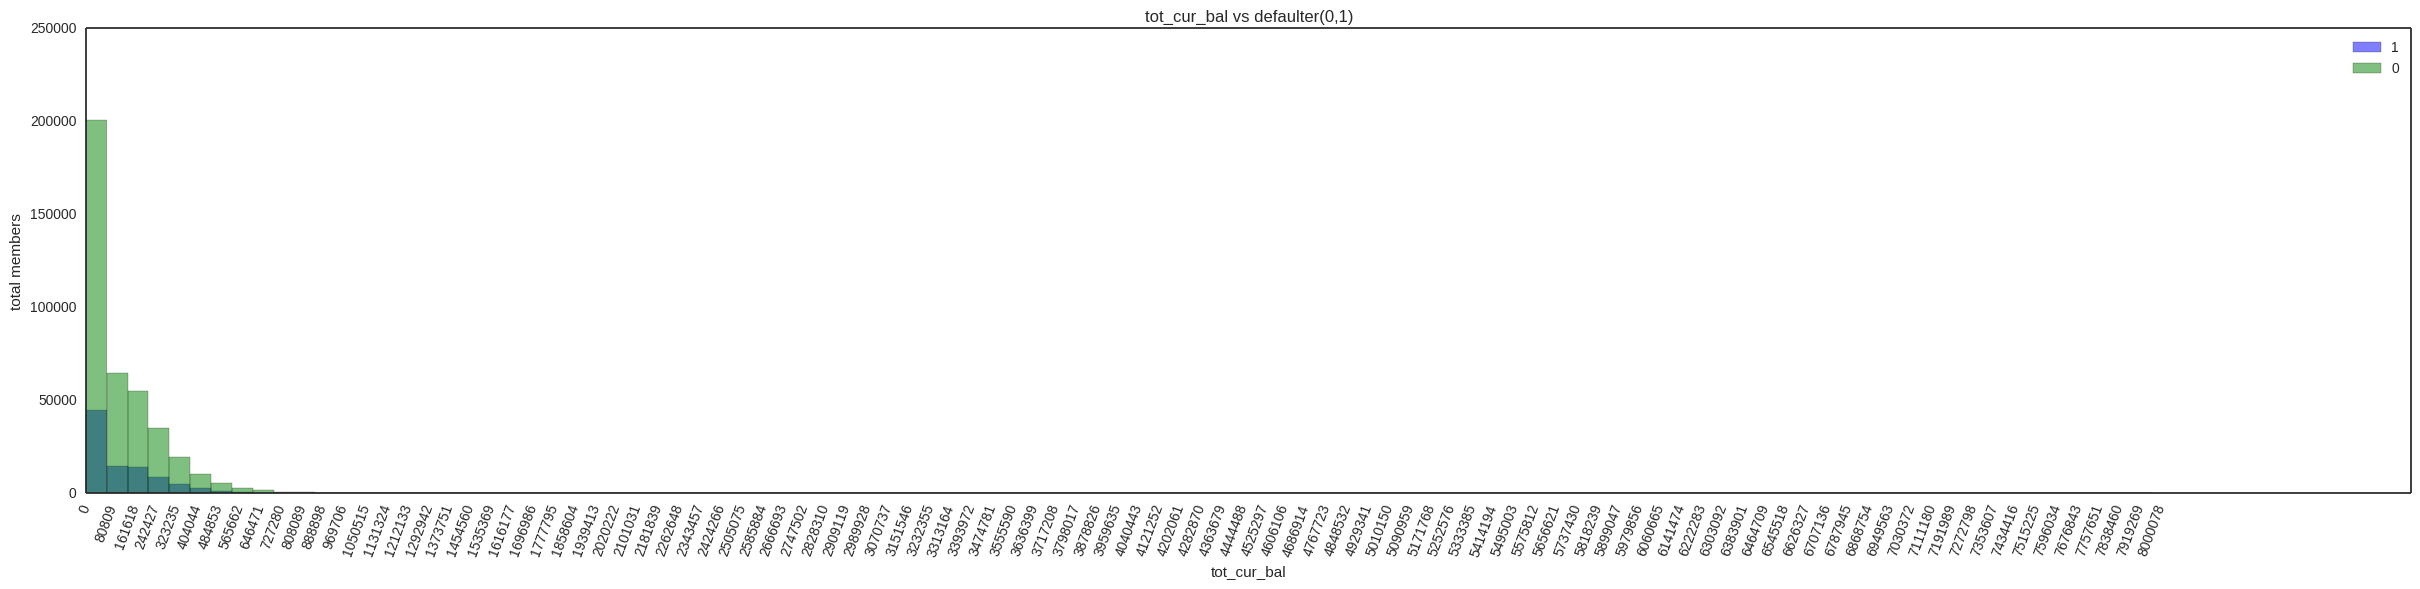

In [992]:
plot_hist(df,'tot_cur_bal',100)

In [993]:
# plot_boxes(df,'tot_cur_bal')

In [994]:
df_duo = log_it(df_duo,'tot_cur_bal')

# for column = total_rec_int

In [995]:
descp(df,'total_rec_int')

count    532428.000000
mean       1753.428788
std        2093.199837
min           0.000000
25%         441.600000
50%        1072.690000
75%        2234.735000
max       24205.620000
Name: total_rec_int, dtype: float64
max 24205.62
min 0.0


0.00       10953
82.76         86
174.90        78
283.29        77
319.41        76
41.37         75
71.33         75
451.32        70
130.12        67
475.52        64
122.73        63
510.60        63
258.02        62
194.92        60
421.37        59
158.96        59
429.99        57
358.33        57
218.59        56
145.89        55
49.65         54
527.97        54
153.41        54
159.48        54
142.64        52
390.61        52
79.47         52
497.15        52
146.88        52
383.29        52
           ...  
2553.49        1
5566.42        1
7.93           1
3475.20        1
744.30         1
1137.74        1
2708.02        1
468.99         1
1251.15        1
2215.71        1
865.41         1
6880.99        1
3461.39        1
6012.27        1
5004.35        1
5751.38        1
1868.29        1
1556.16        1
2074.03        1
3620.60        1
2502.26        1
2553.74        1
1434.03        1
1391.98        1
1376.02        1
3006.05        1
2977.95        1
5891.73       

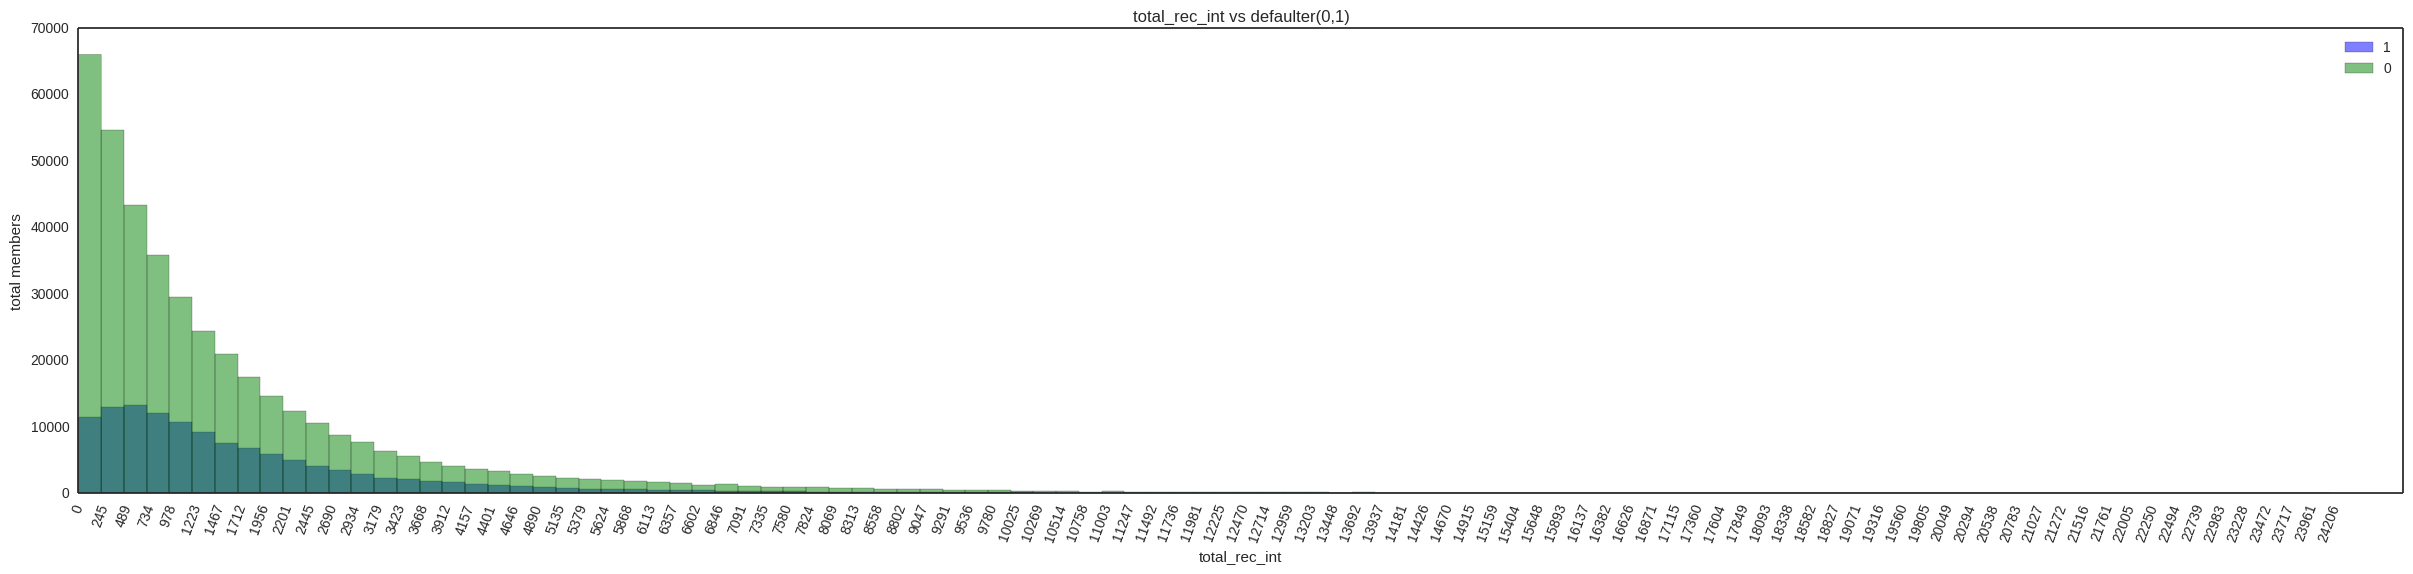

In [996]:
plot_hist(df,'total_rec_int',100)

In [997]:
# plot_boxes(df,'total_rec_int')

In [998]:
def transform_total_rec_int(item):
    if item<=245:
        return 'medium245'
    elif item>245 and item<=734:
        return 'high'
    elif item>734 and item<=6846:
        return 'medium6846'
    else:
        return 'lowest'

df_duo['rec_int'] = df_duo['total_rec_int'].map(transform_total_rec_int)
df_duo = dummy_it(df_duo,'total_rec_int','rec_int')

# for column = total_rec_late_fee

In [999]:
descp(df,'total_rec_late_fee')

count    532428.000000
mean          0.394954
std           4.091546
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64
max 358.68
min 0.0


0.000000      524986
15.000000       1680
30.000000        219
45.000000         31
18.870000         10
16.370000         10
18.020000          9
20.600000          9
16.840000          9
20.500000          9
44.030000          9
20.210000          9
60.000000          9
16.770000          9
22.750000          9
26.220000          8
33.350000          8
10.000000          8
61.190000          8
17.480000          8
16.060000          8
16.610000          8
17.410000          8
16.930000          7
19.130000          7
15.190000          7
23.910000          7
19.640000          7
18.080000          7
15.940000          7
               ...  
14.982940          1
37.217074          1
14.924853          1
25.808498          1
33.251707          1
14.869147          1
49.173997          1
14.962626          1
26.920000          1
35.650000          1
39.420000          1
15.510000          1
57.860000          1
38.640162          1
16.397028          1
21.155490          1
16.144560    

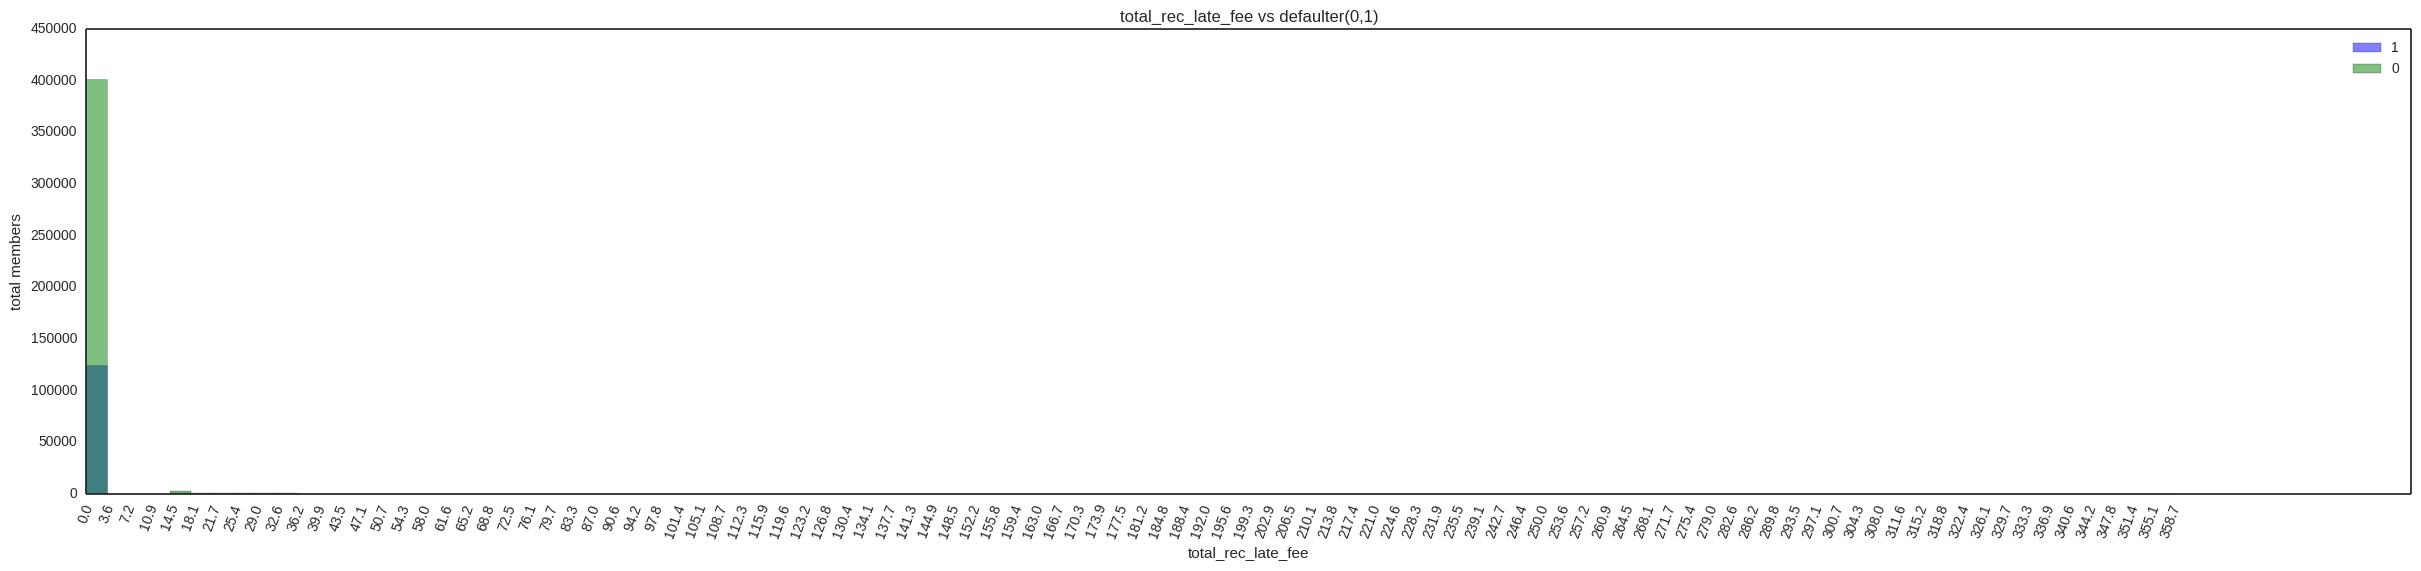

In [1000]:
plot_hist(df,'total_rec_late_fee',100)

In [1001]:
# plot_boxes(df,'total_rec_late_fee')

In [1002]:
df_duo.drop(['total_rec_late_fee'],axis=1,inplace=True)

In [1003]:
df_duo['annual%laon_amnt'] = df_duo['annual_inc'].div(df_duo['loan_amnt'])

In [1004]:
# check till now and store a duo.csv file
#df_duo.info()
df_duo.to_csv('duo.csv',index=False)
print "lele mera"

lele mera


In [1005]:
df_duo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887372 entries, 0 to 887378
Data columns (total 73 columns):
annual_inc                             887368 non-null float64
dti                                    887372 non-null float64
int_rate                               887372 non-null float64
loan_amnt                              887372 non-null int64
loan_status                            532421 non-null float64
tot_cur_bal                            817096 non-null float64
total_acc                              887343 non-null float64
emp_duration_None                      887372 non-null uint8
emp_duration_high                      887372 non-null uint8
emp_duration_low                       887372 non-null uint8
emp_duration_medium                    887372 non-null uint8
ownership_high                         887372 non-null uint8
ownership_low                          887372 non-null uint8
ownership_medium                       887372 non-null uint8
verification_status_Not